# Используемые библиотеки и модули

In [ ]:
# Эта часть Ctrl+С Ctl+V - обычно по-минимому, хватает

#дополнительные библиотеки для установки
!pip install squarify
!pip install -U pandas-profiling #установка пакета для анализа
!jupyter nbextension enable --py widgetsnbextension

!pip install lux-api #Install Lux widget for Jupyter Notebooks
!jupyter nbextension install --py luxwidget
!jupyter nbextension enable --py luxwidget

import pandas as pd
from ydata_profiling import ProfileReport #сводный отчет при помощи ydata_profiling

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
from scipy.interpolate import make_interp_spline



from datetime import datetime, date
import squarify
import scipy.stats as st
from scipy.stats import shapiro, norm

#для загрузки с Яндекс-Диска
import requests
from urllib.parse import urlencode

#для загрузки с docs.google
from io import BytesIO
import requests

# importing the module
import json

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 32.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=c4f872b0e90e00780ef37233bbf9e7d3c877929b2f030024d8a6b621cef5e8da
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook

# О проекте
Фонд «АиФ. Доброе сердце» был создан в 2005-м году по инициативе еженедельной газеты «Аргументы и факты». За эти годы больше 10 тысяч подопечных со сложными диагнозами получили помощь с оплатой операций, лекарств и медоборудования. Мы помогаем тяжелобольным детям и взрослым из разных регионов России, а также развиваем проекты по всесторонней поддержке подопечных семей — чтобы никто не оставался наедине с болезнью.


# Цель
Анализ поведения пользователей (как старых, так и новых ), сегментирование пользователей, рассчет метрики и оценка эффективность каналов взаимодействия фонда с благотворителями.

# Задачи
1. Выделить и проанализировать категории пользователей при помощи методики RFM-анализа
2. Проанализировать информацию о пользователях, содержащихся в датафрейме Исторический импорт (ИсИ):
  * количественный анализ ИсИ, RFM-сегментация
  * доля пользователей ИсИ в существующих компаниях
  * суммы пожертвований ИсИ
  * доля сумм пожертвований ИсИ в существующих компаниях

# Данные для анализа
Для анализа представлены следующие данные:
* данные о каналах привлечения пользователей *channels.pkl*;
* кодировка каналов привлечения пользователей *channels_dict.txt*;
* данные о платежах пользователей *order.csv*;
* данные о пользователях *id_donor.csv*;
* данные об историческом импорте (давние пользователи) *import.csv*

# Выводы и рекомендации



Сводный отчет по фрейму orders.csv (содержит сведения о платежах) был сгенерирован автоматически, используя модуль ydata_profiling

1. В отчёте представлена информация о компаниях за период с 1 января 2021 года по 18 марта 2024 года.
2. В гистограмме по *OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC* хорошо заметен восходящий тренд. Другими словами, со временем количество транзакций увеличивается.  Так же по некоторым успешным компаниям, видны пики.

3. Поле *OrderCustomFieldsRepayment = Повторный рекуррент* - в поле отображаются оформленные подписки (на сайте возможно оформление подписки на 300/500/1500/3000 и произвольную сумму)
  - нет информации - 67793 записи (91,9%)
  - подписка существует - 3469 записи (4,7%)
  - подписка отсуствует - 2501 запись (3,4%)
  - в пропорциональном отношении рекуррентные/нерекуррентные - 58,1%/41,9%
4. Поле *OrderLineBasePricePerItem = Базовая цена продукта за единицу продукта* показывает какие суммы были оформлены в платежах
  - отсутствует информация по 14 342 записям (19,4%)
  - минимальная сумма 0 р.
  - максимальная 1 100 000
  - Топ-3 по сумме платежей
    - 300 р - 12 848 (17,4%)
    - 500 р - 12 313 (16,7%)
    - 100 р - 6 982 (9,5%)
5. Поле *OrderLineStatusIdsExternalId = Идентификатор статуса позиции заказа* - статус транзакций:
- paid оплачена - 52 058 (70.6%)
- notpaid неоплачена - 14 852 (20.1%)
- fail нет информации - 6 853 (9.3%)
______________________
**На что следует обратить внимание**
1. 20% платежей находится в стаусе *notpaid* - не оплачено. Стоит подробно рассмотреть причины - техническая, связанная с работой платежных систем или сайта. Или это человеческий фактор

Если это человеческий фактор - установить дополнительные напоминания для пользователей (товар в корзине, не забудьте завершить операцию и т.д.)

*При средней сумме пожертвования в 2024 году в 800 рублей, потери от неоплаченных транзакций составляют 800 х 14,8 тыс. = 11 840,0 тыс. рублей. Это значимая сумма*

2. Информация по рекурентным платежам так же требует отдельного анализа. В рамках данного исследование нет информации с какого времени появилась возможность оформления подписки, для того, чтобы оценить динамику.

На данный момент количество транзакций с подпиской и без подписки примерно одинаково: 3469 транзакций с подпиской против 2501 без подписки (4,7% и 3,4% соответственно).

Возможные способы мотивировать клиентов оформить подписку:
  - оформление подписки на одном из шагов при совершении транзакции, если такая возможность не предусмотрена;
  - возможность выбрать дату списания денежных средств;
  - возможность выбрать период списания денежных средств;
  - легкость оформления подписки (пройти путь клиента);
  - отчет на электронную почту, на какие конкретно цели (компании) пошли деньги по подписке ("благодаря Вашему участию был закрыт сбор на..., было дополнительно собрано для...) и т.д.
____________________________
___________________

**Отчет по проведенным сборам (компаниям)**

Всего в датафрейме представленно 170 компаний за период с 01.01.2021 по 18.03.2024

146 компаний, проводились, исходя из отчета более 1 дня
У 24 компаний совпадает дата открытия и завершения компании.


Длительные компании, более 1 дня
1. Сборы по сумме
  - min 100 р
  - max 8 555 077 р.
  - среднее - 459 793 р.
  - медианное значение - 180 435 р.

Суммы сборов, превышающие 1 200 000 рублей, можно считать аномальными. Всего таких сборов было 7.
2. В аномальных компаниях по сумме сбора
  - 4/7 комапний длительные - почти 700 дней с средним чеком от 3,6 до 12,2 тыс/день
  - 1 компания длилась всего 6 дней (средний чек 254,0 тыс/день)

3. По длительность проводимые компании:
  - min - 2 дня;
  - max - 939 дней;
  - средняя продолжительность - 176 дней;
  - медианное значение - 104 дня

Сборы, длительностью более 390 дней можно считать аномальными, таких сборов всего 17
4. В аномальных по длительности сборах:
  - 6/17 - неименные сборы (пожертовавания, на уставную деятельность, пострадавшим ДНР и ЛНР)
  - 3/17 сборов неактивны (На уставную деятельность за 2021-2022 годы, два именных сбора)
  - 3/17 сборов - диагноз Муковисцидоз
  - оставшиеся - так же с диагнозами, требующие длительного наблюдения и коррекции

5. Компании, у которых совпадают даты открытия и закрытия сбора внесены вручную, в 9 различных дат (от 1 до 5 компаний за дату)

В среднем одна кампания длится от 104 до 176 дней. В сутки удаётся собрать от 1 200 до 7 000 рублей. Средняя сумма сбора составляет от 180 000 до 450 000 рублей.
______________________
**На что следует обратить внимание**
Чтобы более точно оценить эффективность проводимых компаний, важно понимать, с какой целью они проводились.

Если речь идёт о разовой помощи, например, в связи с косметической операцией, то срок проведения такой кампании может быть примерно равен среднему.

С другой стороны, кампании, связанные, например, с генетическими заболеваниями или сложными и продолжительными операциями, могут быть довольно длительными.
_______
_______

**RFM-анализ**

1. По итогам анализа было выделено 8 категорий пользователей
2. Топ3 (Спящие, Растущие, Новички) - перекрывают 84,12% представленной пользовательской базы
3. Категория
- Спящие
  - в составе 5 980 пользователей (32,06%)
  - Средняя давность последнего взноса - 786.90 дней (больше 2 лет назад)
  - в среднем делали 1,24 взноса
  - средний чек (сумма взносов) - 676.86 руб
- Растущие
  - в составе 5 737 пользователей (30,76%)
  - Средняя давность последнего взноса - 311.37 дня
  - в среднем делали 1,38 взноса
  - средний чек (сумма взносов) - 695,51 руб
- Новички
  - в составе 3 972 пользователей (21,30%)
  - Средняя давность последнего взноса - 62.62 дня (1 раз в 2 месяца)
  - в среднем делали 1,22 взноса
  - средний чек (сумма взносов) - 871.47 руб
- Чемпионы
  - в составе 1 098 пользователя (5,89%)
  - Средняя давность последнего взноса - 36.51 дня (1 месяц назад)
  - в среднем делали 17.70 взноса (!)
  - средний чек (сумма взносов) - 13 597.23руб (!)
- Лояльные
  - в составе 633 пользователя (3,39%)
  - Средняя давность последнего взноса - 53.30 дня
  - в среднем делали 6.44 взноса
  - средний чек (сумма взносов) - 4 505.38 руб
- На грани
  - в составе 509 пользователz (2.73%)
  - Средняя давность последнего взноса - 350.34 дня
  - в среднем делали 6.62 взноса
  - средний чек (сумма взносов) - 1 619.09 руб
- В зоне риска
  - в составе 429 пользователя (2,30%)
  - Средняя давность последнего взноса - 561,50 дня
  - в среднем делали 9,39 взноса
  - средний чек (сумма взносов) - 17 209,78 руб
- Требуют внимание
  - в составе 294 пользователей (1.58%)
  - Средняя давность последнего взноса - 336,25 дня
  - в среднем делали 3,15 взноса
  - средний чек (сумма взносов) - 5 701.78 руб

3. Распределения по времени (R-показатель). Из 8 групп, в 5 давность последнего взноса исчисляется годами (от 2/3 года до 2 лет), в 3 - месяцами (1-2) месяца.

4. Очень большой средний чек (средняя сумма взноса) у Чемпионов сочетается с большой частотой таких взносов - 17,69 взноса.

5. Самый большой чек у категории, находящейся в Зоне риска - 17 209,78 руб. сочетается с длительным показаетелем последнего взноса - 561,50 дня (почти 1,5 года назад)

6. Самая большая категория - Спящие, составляет около трети всех пользователей.
___________
**На что следует обратить внимание**

По согласованию с заказчиком, чтобы более точно оценить сегменты, можно сократить рассматриваемый период, например, до полутора лет. Всех пользователей, которые за это время не совершили ни одной транзакции, можно отнести к категории "Спящие".

Такой подход поможет нам более точно проанализировать показатели RFM с учётом текущей ситуации.

«Спящие» пользователи составляют 32% от всей исследуемой базы — это 5 980 человек. Средний размер их взноса составляет 676 рублей, а регулярность платежей — 1,24 раза в год. Если даже 20% «Спящих» пользователей перейдут в категорию «Растущих», фонд дополнительно получит 1,012 миллиона рублей в год (676 рублей x 1,24 x 5980 пользователей x 0,2).

Категория пользователей «В зоне риска» имеет самый большой средний чек — 17,2 тысячи рублей. Они делали последние взносы более полутора лет назад (561 день). За это время они совершили 9,39 взноса. Такая высокая частота взносов свидетельствует о том, что для этой категории пользователей будут актуальны предложения по подписке. В составе этой категории всего 429 человек - есть возможность точечной индивдуальной проработки

Так же, предложения по подписке будут актуальны для категорий "На грани" (6,62 взноса за период) и "Лояльные" (6,44 взноса за период). Эти группы так же относительно малочисленны и тоже могут быть обработаны индивидуально
___________
___________

**Исторический импорт**

1. Всего в файле Исторический импорт содержится 7651 уникальный пользователь
2. В рассматриваемом датафрейме из Исторического импорта перешли 2756 пользователя (36%)

По Историческому импорту
3. В разрезе отношение количество людей в категории к общему количеству ТОП-3
- Спящие 1951 человек (70.79%)
- Чемпионы 259 человек (9.40%)
- Растущие 138 (5.01%)
4. В разрезе отношение суммы взносов к количеству пользователей в категории (средняя сумма взноса на 1 пользователя в категории), ТОП-3
- В зоне риска - 19 098.48 руб.
- Чемпионы - 13 714.92 руб
- Лояльные - 5 096.05 руб

По Историческому импорту ко всей базе
5. В разрезе отношение количество людей Исторического импорта к общему количеству людей внутри категории всего датафрейма
- Спящие - 32.63%
- В зоне риска - 28.90%
- Чемпионы - 23.59%
- На грани - 22.99%

Т.е. можно говорить, что в 4 из 8 категориях Исторический импорт составляет не менее 25% от общего количества пользователей, в т.ч. и в категориях Чемпионы, Взоне риска, На грани

6. В разрезе отношение сумм взносов Исторического импорта к общим суммам внутри категории всего датафрейма
- В зоне риска - 32.08%
- Спящие - 32.03%
- На грани - 28.29%
- Чемпионы - 23.79%

Т.е. опять можно говорить, что в 4 из 8 значимых категориях по суммам взносов, Исторический импорт составляет от 25 до 30%
____________
**На что следует обратить внимание**

В целом, до 36% пользователей, которые были перенесены из Исторического импорта, продолжают сотрудничество с фондом. Аналогичное соотношение, составляющее 25–30%, можно наблюдать в каждой категории. С ними необходимо работать в первую очередь, так же как и с категориями, к которым они относятся.

Оставшиеся 64% пользователей (4895 человек) не относятся к числу приоритетных для отработки по возвращению. Т.к., например, в категории «Спящие» сейчас находится 5980 человек, которые более лояльны (являются "более прогретыми") и, следовательно, являются приоритетными для возвращения к сотрудничеству.
__________
__________

## Orders.csv

Датафрейм содержит информацию о платежах пользователей

### Общий анализ orders

In [ ]:
# загрузим информацию о пользователях
df_or=pd.read_csv('/content/drive/MyDrive/AiF/order.csv', sep=';', encoding='windows-1251')
df_or.head(5).style

<ipython-input-2-7b770ce3a9dc>:2: DtypeWarning: Columns (9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_or=pd.read_csv('/content/drive/MyDrive/AiF/order.csv', sep=';', encoding='windows-1251')


Сделаем дубль базы и с ней будем работать дальше

In [ ]:
df_order=df_or
df_order.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73763 entries, 0 to 73762
Data columns (total 21 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   OrderIdsMindboxId = Идентификатор Mindbox                                    73763 non-null  int64  
 1   OrderFirstActionIdsMindboxId = Идентификатор Mindbox                         73763 non-null  int64  
 2   OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC          73763 non-null  object 
 3   OrderFirstActionChannelIdsMindboxId = Идентификатор Mindbox                  73763 non-null  int64  
 4   OrderFirstActionChannelIdsExternalId = Внешний идентификатор точки контакта  73763 non-null  object 
 5   OrderFirstActionChannelName = Имя точки контакта                             73763 non-null  object 
 6   OrderAreaIdsExternalId = Идентификатор

In [ ]:
#переведем OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC в datetime
df_order['OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC']=pd.to_datetime(df_order['OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC'])


<ipython-input-4-be62ac9b9f14>:2: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_order['OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC']=pd.to_datetime(df_order['OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC'])


In [ ]:
# Период анализа
print ('База по платежам с',
       df_order['OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC'].min(),
       ' по',
       df_order['OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC'].max())

База по платежам с 2021-01-01 00:00:00  по 2024-03-18 12:03:00


### Сводный отчет по *order.csv (df_order)* через ydata_profiling
Проанализируем, как выгдядит информация в файле при помощи ydata_profiling

In [ ]:
profile = ProfileReport(df_order, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Вывод по сводному отчету

Сводный отчет формируется автоматически, используя модуль ydata_profiling

1. В отчете содержатся информация по компаниям с 01.01.2021 по 18.03.2024
2. В гистограмме по *OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC* четко прослеживается временной восходящий тренд, т.е. со временем количество транзакций увеличивается. Так же по некоторым компаниям, предположительно, видны всплески/пики
3. Поле *OrderCustomFieldsRepayment = Повторный рекуррент* - в поле отображаются оформленные подписки (на сайте возможно оформление подписки на 300/500/1500/3000 и произвольную сумму)
  - нет информации - 67793 записи (91,9%)
  - подписка существует - 3469 записи (4,7%)
  - подписка отсуствует - 2501 запись (3,4%)
  - в пропорциональном отношении рекуррентные/нерекуррентные - 58,1%/41,9%
4. Поле *OrderLineBasePricePerItem = Базовая цена продукта за единицу продукта* показывает какие суммы были оформлены в платежах
  - отсутствует информация по 14 342 записям (19,4%)
  - минимальная сумма 0 р.
  - максимальная 1 100 000
  - Топ-3 по сумме платежей
    - 300 р - 12 848 (17,4%)
    - 500 р - 12 313 (16,7%)
    - 100 р - 6 982 (9,5%)
5. Поле *OrderLineStatusIdsExternalId = Идентификатор статуса позиции заказа* - статус транзакций:
- paid оплачена - 52 058 (70.6%)
- notpaid неоплачена - 14 852 (20.1%)
- fail нет информации - 6 853 (9.3%)

### Проведенные компании

In [ ]:
# Количество компаний, организованных фондом
df_order['OrderLineProductName = Техническое название продукта'].nunique()

170

Т.е. с 01.01.2021 по 18.03.2024 было проведено 170 компаний

Проанализируем, какая компания принесла за период наибольшее количество денег

In [ ]:
df_comp=df_order.groupby('OrderLineProductName = Техническое название продукта')['OrderLinePriceOfLine = Конечная цена'].sum().reset_index().sort_values('OrderLinePriceOfLine = Конечная цена',
                                                                                                                                                 ascending=False)
df_comp['perc']=round(df_comp['OrderLinePriceOfLine = Конечная цена']/sum(df_comp['OrderLinePriceOfLine = Конечная цена'])*100, 3)
df_comp.head(20).style

Наибольшее количество средств в общем принесли не конкретные сборы, а пожертвования на фонд в целом
- на уставную деятельность - 11,584%;
- Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование на уставную деятельность БФ «АиФ. Доброе сердце» - 8,369%;
- Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование (хочу помочь)	- 7,138%

Такой результат логичен, т.к. такие компании неограничены во времени (или ограничены?)

Проверим, насколько компании с неперсонализированными компаниями ограничены по времени

In [ ]:
# компания "На уставную деятельность"

print ('Компания "На уставную деятельность проходила с',
       df_order[df_order['OrderLineProductName = Техническое название продукта']== 'На уставную деятельность']['OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC'].min(),
       'по ',
       df_order[df_order['OrderLineProductName = Техническое название продукта']== 'На уставную деятельность']['OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC'].max())

Компания "На уставную деятельность проходила с 2021-01-01 00:00:00 по  2022-11-30 00:00:00


In [ ]:
# компания "Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование на уставную деятельность БФ «АиФ. Доброе сердце»"

print ('Компания "Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование на уставную деятельность БФ «АиФ. Доброе сердце» проходила с',
       df_order[df_order['OrderLineProductName = Техническое название продукта']== 'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование на уставную деятельность БФ «АиФ. Доброе сердце»']['OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC'].min(),
       'по ',
       df_order[df_order['OrderLineProductName = Техническое название продукта']== 'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование на уставную деятельность БФ «АиФ. Доброе сердце»']['OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC'].max())

Компания "Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование на уставную деятельность БФ «АиФ. Доброе сердце» проходила с 2022-04-06 12:53:00 по  2024-03-18 10:55:00


In [ ]:
# компания "Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование (хочу помочь)"

print ('Компания "Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование (хочу помочь) проходила с',
       df_order[df_order['OrderLineProductName = Техническое название продукта']== 'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование (хочу помочь)']['OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC'].min(),
       'по ',
       df_order[df_order['OrderLineProductName = Техническое название продукта']== 'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование (хочу помочь)']['OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC'].max())

Компания "Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование (хочу помочь) проходила с 2022-04-06 16:45:00 по  2024-03-18 10:42:00


Получается, что компании лидеры проходили
- На уставную деятельность - 11,584% / в теч.2021 по 30.11.2022 г. ;
- Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование на уставную деятельность БФ «АиФ. Доброе сердце» - 8,369%  / в с 06.04.2022 по конец периода анализа;
- Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование (хочу помочь)	- 7,138%  / с 06.04.2022 по конец периода анализа

Первая комапания *"На уставную деятельность"* и вторая компания *"Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование на уставную деятельность БФ «АиФ. Доброе сердце»* исходя из названия дублируют друг-друга и в течение апреля-ноября 2022 года проходили прараллельно. Возможно проходила компания замещения

Рассмотрим как эти компании проходили в период замещения исходя из показателей дата - сумма

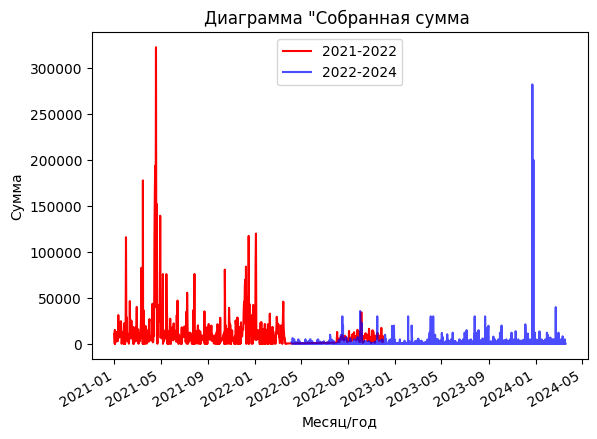

In [ ]:
df_order[df_order['OrderLineProductName = Техническое название продукта']== 'На уставную деятельность'].groupby('OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC')['OrderLinePriceOfLine = Конечная цена'].sum().plot(color='r')
df_order[df_order['OrderLineProductName = Техническое название продукта']== 'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование на уставную деятельность БФ «АиФ. Доброе сердце»'].groupby('OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC')['OrderLinePriceOfLine = Конечная цена'].sum().plot(color = 'b',
                                                                                                                                                                                                                                                                                                                                          alpha=0.7)
plt.title('Диаграмма "Собранная сумма ')
plt.xlabel('Месяц/год')
plt.ylabel('Сумма')
plt.legend(['2021-2022', '2022-2024'])
plt.show()

На диаграмме видно, что эти две компании проходили одновременно, с разнымими успехами (т.е. по первой компании перекрест со второй не является выбросом в одну-две тразакции), но после 06.2022 первая компания была свернута.


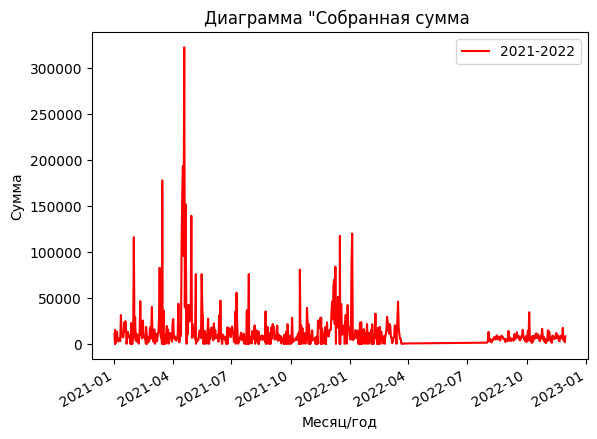

In [ ]:
df_order[df_order['OrderLineProductName = Техническое название продукта']== 'На уставную деятельность'].groupby('OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC')['OrderLinePriceOfLine = Конечная цена'].sum().plot(color='r')

plt.title('Диаграмма "Собранная сумма ')
plt.xlabel('Месяц/год')
plt.ylabel('Сумма')
plt.legend(['2021-2022', '2022-2024'])
plt.show()

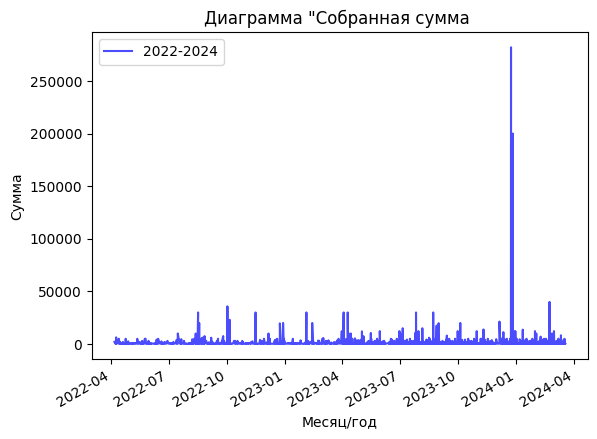

In [ ]:
df_order[df_order['OrderLineProductName = Техническое название продукта']== 'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование на уставную деятельность БФ «АиФ. Доброе сердце»'].groupby('OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC')['OrderLinePriceOfLine = Конечная цена'].sum().plot(color = 'b',
                                                                                                                                                                                                                                                                                                                                          alpha=0.7)
plt.title('Диаграмма "Собранная сумма ')
plt.xlabel('Месяц/год')
plt.ylabel('Сумма')
plt.legend(['2022-2024'])
plt.show()

Теперь посмотрим насколько были успешными компании в рамках относительного привлечения денежных средств, т.е. вычислим те ТОР-10 компаний, которые приносили за 1 день проведения наибольшую сумму.



In [ ]:
df_comp=df_order.groupby('OrderLineProductName = Техническое название продукта').agg({'OrderLinePriceOfLine = Конечная цена': 'sum',
                                                                                      'OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC': ['min', 'max']})#.sort_values('OrderLinePriceOfLine = Конечная цена', ascending=False)
df_comp=df_comp.droplevel(0, axis=1).reset_index()

df_comp['delta']=(df_comp['max']-df_comp['min']).dt.days.astype('int16')
for n in range(len(df_comp)):
  if df_comp.loc[n,'delta'] == 0:
    df_comp.loc[n, 'delta_mean']=-1 # здесь будут сборы, срок которых равен 0, т.е. день открытия сбора совпадает с днем закрфтия
  else:
    df_comp.loc[n, 'delta_mean']=round(df_comp.loc[n,'sum']/df_comp.loc[n, 'delta'], 0)
df_comp.sort_values(by='delta_mean', ascending=False).head(20).style

Итак, в ТОП-5 по сборам денежных средств (сумма за сутки сбора)

1. Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Григорий Белослюдцев	/1 520 388 /	6 дней / 253 398
2. Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Варвара Лукинова	/672 267 / 4 дня /	168 067
3. Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Алина Охлопкова	/332 710	/ 3 дня /	110 903
4. Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Ольга Орлова	/318 105	/	6 дней	/ 53 018
5. Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Максим Широкин	/158 4352	/	49 дней	/ 32 334





#### Cумма сбора *sum*
Посмотрим, как распределены данные по количеству дней на сбор, а так же по средней сумме сбора.
Для начала исключим те сборы, у которых поле *delta_mean*=-1

In [ ]:
df_comp1=df_comp[df_comp['delta_mean']>-1].reset_index()
df_comp1.drop(df_comp1.columns[[0]], axis=1, inplace=True) # убираем ненужный столбец с бывшими индексами
df_comp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 6 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   OrderLineProductName = Техническое название продукта  146 non-null    object        
 1   sum                                                   146 non-null    int64         
 2   min                                                   146 non-null    datetime64[ns]
 3   max                                                   146 non-null    datetime64[ns]
 4   delta                                                 146 non-null    int16         
 5   delta_mean                                            146 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int16(1), int64(1), object(1)
memory usage: 6.1+ KB


In [ ]:
# Таких сборов - 146 (изначально было 170, следовательно 24 сбора рассмотрим позднее)
df_comp1.head(10)

OrderLineProductName = Техническое название продукта      sum  \
0                           На уставную деятельность    8555077   
1  Пожертвование Благотворительный фонд «АиФ. Доб...      39887   
2  Пожертвование Благотворительный фонд «АиФ. Доб...     120201   
3  Пожертвование Благотворительный фонд «АиФ. Доб...     426445   
4  Пожертвование Благотворительный фонд «АиФ. Доб...       1570   
5  Пожертвование Благотворительный фонд «АиФ. Доб...      93246   
6  Пожертвование Благотворительный фонд «АиФ. Доб...      53296   
7  Пожертвование Благотворительный фонд «АиФ. Доб...     488707   
8  Пожертвование Благотворительный фонд «АиФ. Доб...     562869   
9  Пожертвование Благотворительный фонд «АиФ. Доб...     332710   

                  min                 max  delta  delta_mean  
0 2021-01-01 00:00:00 2022-11-30 00:00:00    698     12257.0  
1 2023-11-02 14:51:00 2024-01-25 08:24:00     83       481.0  
2 2023-10-10 06:37:00 2024-03-12 22:24:00    154       781.0  
3 2022-11-26 08:09:00 2023-03-07 19:03:00    101      4222.0  
4 2021-07-21 00:00:00 2021-09-09 00:00:00     50        31.0  
5 2023-03-28 07:14:00 2023-05-06 16:56:00     39      2391.0  
6 2021-06-29 00:00:00 2022-01-29 00:00:00    214       249.0  
7 2022-02-11 00:00:00 2022-06-16 07:26:00    125      3910.0  
8 2024-02-14 07:42:00 2024-03-06 21:01:00     21     26803.0  
9 2023-01-08 18:42:00 2023-01-12 15:00:00      3    110903.0

In [ ]:
perc = [ .75, .90, .95, .99]
df_comp1['sum'].describe(perc).apply(lambda x: format(x, 'f'))

count        146.000000
mean      459793.342466
std      1000729.320508
min          100.000000
50%       180434.500000
75%       574096.750000
90%       833592.500000
95%      1118443.000000
99%      5771493.550000
max      8555077.000000
Name: sum, dtype: object

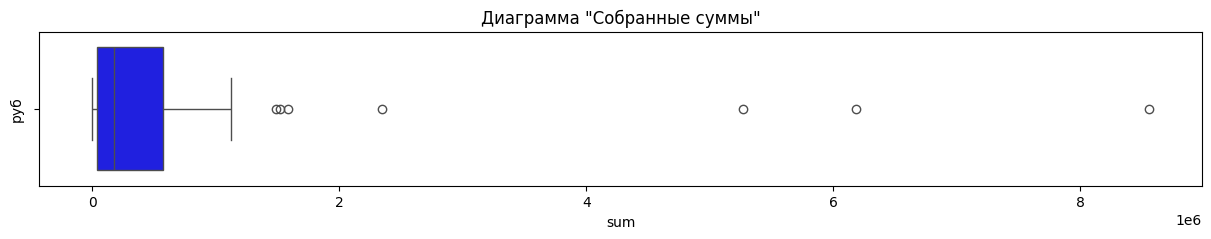

In [ ]:
plt.figure(figsize=(15, 2))
sns.boxplot(
    x='sum',
    data=df_comp1,
    color='blue')


plt.title('Диаграмма "Собранные суммы"')
plt.ylabel('руб')
plt.show()

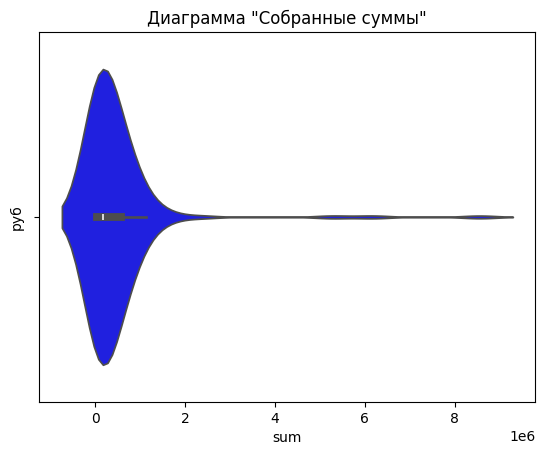

In [ ]:
sns.violinplot(
    x='sum',
    data=df_comp1,
    color='blue');
plt.title('Диаграмма "Собранные суммы"')
plt.ylabel('руб')
plt.show()

In [ ]:
df_comp1['sum'].median()

180434.5

In [ ]:
# количество сборов более 1 200,0 т.р. - которые идут за пределами
df_comp1[df_comp1['sum']>1200000]['sum'].count()

7

Рассмотрим, что это за 7 компаний

In [ ]:
df_comp1.sort_values(by='sum', ascending=False).head(7).style

В этих 7 аномальных компаниях
- две постоянные компании без цели "На уставную деятельность" и "Хочу помочь"
- 4 из 7 компаний длились почти 700 дней (скромный средний чек сбора от 3,6 до 12,2 тыс/день)
- 1 компания длилась 124 дня (средний чек сбора 12,0 тыс/день)
- 1 компания длилась 49 дней (средний чек 32,3 тыс/день)
- 1 компания длилась всего 6 дней (средний чек 254,0 тыс/день)

#### Длительность сбора *delta*

Проанализируем, среднюю продолжительность каждой компании

In [ ]:
perc = [ .75, .90, .95, .99]
df_comp1['delta'].describe(perc)

count    146.000000
mean     175.952055
std      210.557989
min        2.000000
50%      104.000000
75%      191.250000
90%      522.000000
95%      703.500000
99%      882.450000
max      939.000000
Name: delta, dtype: float64

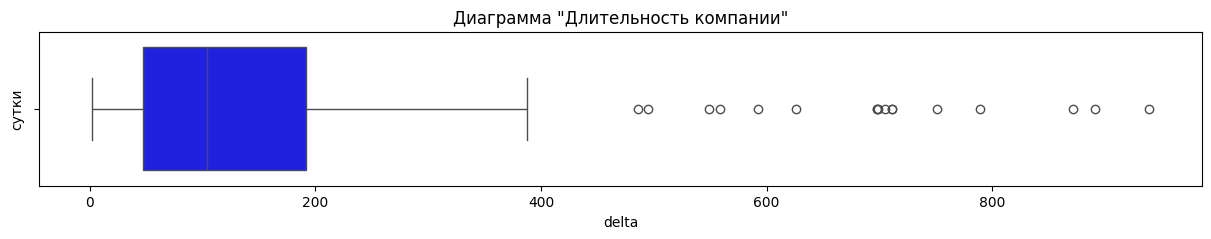

In [ ]:
plt.figure(figsize=(15, 2))
sns.boxplot(
    x='delta',
    data=df_comp1,
    color='blue')


plt.title('Диаграмма "Длительность компании"')
plt.ylabel('сутки')
plt.show()

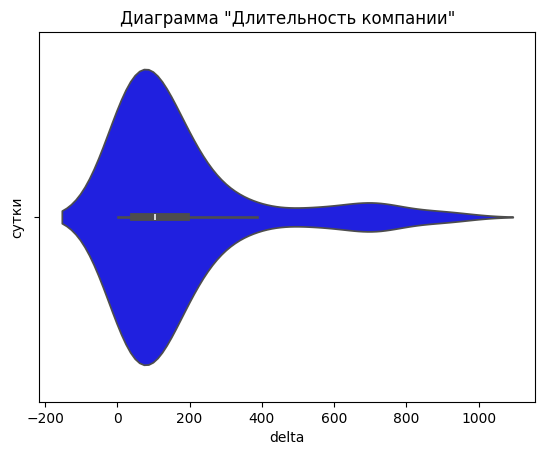

In [ ]:
sns.violinplot(
    x='delta',
    data=df_comp1,
    color='blue');
plt.title('Диаграмма "Длительность компании"')
plt.ylabel('сутки')
plt.show()

In [ ]:
df_comp1['delta'].median()

104.0

Из диаграмм видно, что основная длительность проведения компаний проходит в интервале от 0 до 200 дней.

Все компании, длительность которых превышает 390 дней можно считать аномалиями

Проанализируем сколько таких аномальных компаний

In [ ]:
# компании, с длительностью более 390 дней
df_comp1[df_comp1['delta']>390]['delta'].count()

17

In [ ]:
df_comp1.sort_values(by='delta', ascending=False).head(17).style

Из 17 длительных компаний, 6 компаний являются длительными (бессрочными)
- На уставную деятельность (закончена 30.11.2022)
- Пожертвование на уставную деятельность БФ «АиФ. Доброе сердце»
- Пожертвование регулярное
- Пожертвование (хочу помочь)
- Поможем жителям ДНР и ЛНР
- Доброе сердце» Пожертвование

Остальные компании связаны с конкретными людьми
- 3 компании видимо неактивны, т.к. последние транзакции зафиксированы в октябре 2023 года
- 3 комании связаны с заболеванем Муковисцидоз, лечение которого требуется на протяжении всей жизни
- оставшиеся заболевания так же связаны с длительным лечением (сердце, лицевая хирургия, аллергические реакции и т.д.)


#### Средняя сумма сбора *delta_mean*

Проанализируем среднюю сумму сбора (сумма за день)

In [ ]:
perc = [ .75, .90, .95, .99]
df_comp1['delta_mean'].describe(perc)

count       146.000000
mean       7321.760274
std       26985.370580
min          14.000000
50%        1239.000000
75%        4217.500000
90%       12012.500000
95%       20957.250000
99%      142343.200000
max      253398.000000
Name: delta_mean, dtype: float64

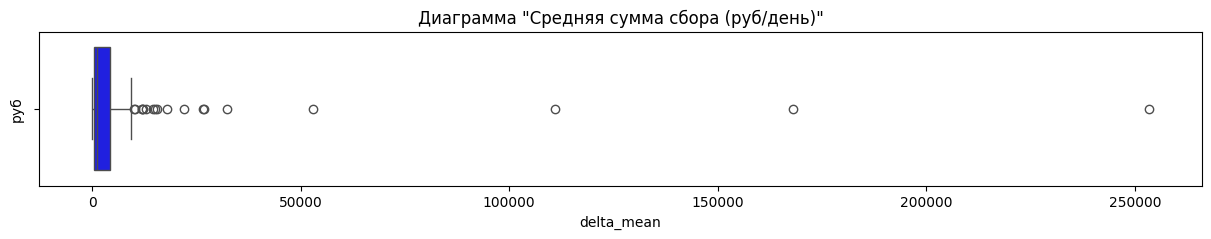

In [ ]:
plt.figure(figsize=(15, 2))
sns.boxplot(
    x='delta_mean',
    data=df_comp1,
    color='blue')


plt.title('Диаграмма "Средняя сумма сбора (руб/день)"')
plt.ylabel('руб')
plt.show()

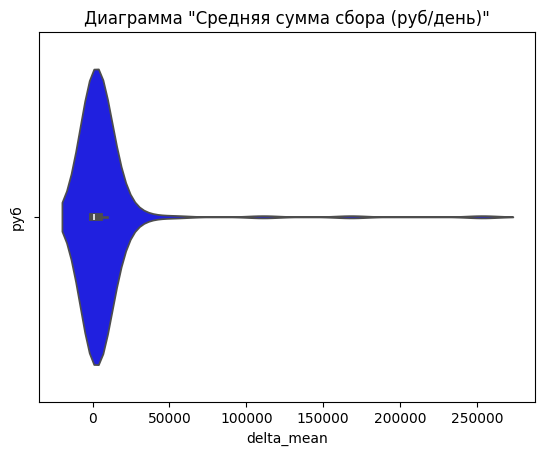

In [ ]:
sns.violinplot(
    x='delta_mean',
    data=df_comp1,
    color='blue');
plt.title('Диаграмма "Средняя сумма сбора (руб/день)"')
plt.ylabel('руб')
plt.show()

In [ ]:
df_comp1['delta_mean'].median()

1239.0

Из диаграмм видно, что большиство средних сборов расположено очень близко к 10 000 рублей. В частности, медианная сумма равна 1239 руб, средння 7321 руб

Все суммы сборов в день больше 15 000 рублей можно отнести к аномальным.

Рассмотрим эти сборы

In [ ]:
# компании, с средним сбором в день более 15,0 тыс.рублей
df_comp1[df_comp1['delta_mean']>15000]['delta'].count()

10

Таких сборов 10.

Проанализируем их

In [ ]:
df_comp1.sort_values(by='delta_mean', ascending=False).head(10).style

- 7/10 сборов по срокам прошли в теч. от 3 до 21 дня
- 3/10 сборов были организованы в 2022 году
- 2/10 сборов были организованы в 2023 году
- 5/10 сборов были организованы в 2024 году (с учетом того, что в 2024 году в анализ попали даты до 18.03.2024)

#### Сумма сбора "-1" (даты открытия и закрытия сбора совпадают)

Проанализируем суммы сборов по компаниям, у которых срок открытия и закрытия сбора совпадают



In [ ]:
df_comp1=df_comp[df_comp['delta_mean']==-1].reset_index()
df_comp1.drop(df_comp1.columns[[0]], axis=1, inplace=True) # убираем ненужный столбец с бывшими индексами
df_comp1.style

Действительно, эти сборы открыты и закрыты одной датой каждый, разница в некоторых - несколько минут.

Возможно, что они были вручную добавлены в отчет администратором

In [ ]:
df_comp1['max_YM']=df_comp1['max'].dt.to_period("D") #даты добавления без учета времени
df_comp1.groupby('max_YM')['sum'].count()


max_YM
2021-11-26    2
2022-05-12    1
2022-06-03    2
2022-06-07    1
2023-01-08    4
2023-01-10    5
2023-01-12    5
2023-02-01    1
2023-02-13    3
Freq: D, Name: sum, dtype: int64

Видно, что компании внесены количественно

### Вывод сумма, длительность сбора, средняя сумма сбора

Всего в датафрейме представленно 170 компаний за период с 01.01.2021 по 18.03.2024

У 24 компаний совпадает дата открытия и завершения компании.


1. Рассмотрим 146 компаний, т.е. те, которые проводились, исходя из отчета более 1 дня
2. Сборы по сумме
  - min 100 р
  - max 8 555 077 р.
  - среднее - 459 793 р.
  - медианное значение - 180 435 р.
  - суммы сборов более 1 200 000 р. можно считать аномальными, т.е. они встречаются реже, таких сборов всего 7
3. В аномальных компаниях по сумме сбора
  - 4/7 комапний длительные - почти 700 дней с средним чеком от 3,6 до 12,2 тыс/день
  - 1 компания длилась всего 6 дней (средний чек 254,0 тыс/день)
4. Длительность проводимых компаний:
  - min - 2 дня;
  - max - 939 дней;
  - средняя продолжительность - 176 дней;
  - медианное значение - 104 дня
  - сборы, длительностью более 390 дней можно считать аномальными, таких сборов всего 17
5. В аномальных по длительности сборах:
  - 6/17 - неименные сборы (пожертовавания, на уставную деятельность, пострадавшим ДНР и ЛНР)
  - 3/17 сборов неактивны (На уставную деятельность за 2021-2022 годы, два именных сбора)
  - 3/17 сборов - диагноз Муковисцидоз
  - оставшиеся - так же с диагнозами, требующие длительного наблюдения и коррекции
6. Компании, у которых совпадают даты открытия и закрытия сбора внесены вручную, в 9 различных дат (от 1 до 5 компаний за дату)

_________________

В целом можно сказать, что в среднем продолжительность 1 компании составляет от 104 до 176 дней, в сутки собирается в среднем от 1 200 до 7 000 рублей, средняя сумма сбора от 180,0 до 450,0 тыс.



### Платежи

Проанализируем, как распределяются платежные суммы с учетом
- времени проведения компании (год)
- рекуррентности (изменение количества подписок)
- статуса оплаты
- суммы компаний

In [ ]:
df_comp1=df_order
# Добавим три столбца - год проведения компании, год и месяц проведения компании, год/месяц/день
df_comp1['max_Y']=df_comp1['OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC'].dt.to_period("Y")
df_comp1['max_YM']=df_comp1['OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC'].dt.to_period("M")
df_comp1['max_d']=df_comp1['OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC'].dt.to_period("D")
df_comp1.head(10).style

#### Суммы сборов (год/месяц/дни)

In [ ]:
df_comp1.groupby('max_Y')['OrderLinePriceOfLine = Конечная цена'].sum()

max_Y
2021     7592698
2022    20389471
2023    38843245
2024     7197205
Freq: A-DEC, Name: OrderLinePriceOfLine = Конечная цена, dtype: int64

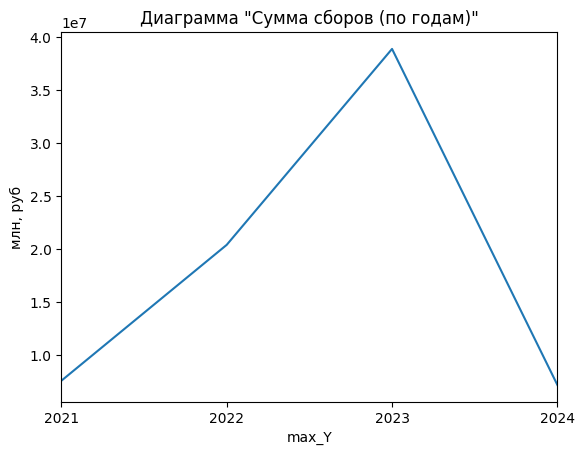

In [ ]:
df_comp1.groupby('max_Y')['OrderLinePriceOfLine = Конечная цена'].sum().plot()
plt.title('Диаграмма "Cумма сборов (по годам)"')
plt.ylabel('млн, руб')
plt.show()

2024 год сбор неполный (информация по 18.03.2024)

Добавим график по месяцам

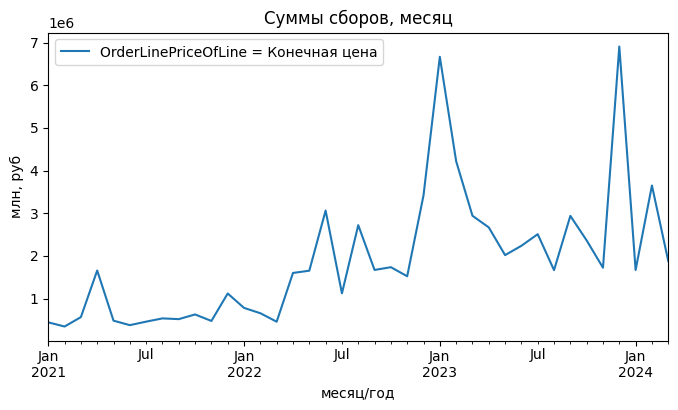

In [ ]:
df_graph=df_comp1.groupby('max_YM')['OrderLinePriceOfLine = Конечная цена'].sum().reset_index()
df_graph.plot(
    x='max_YM',
    y='OrderLinePriceOfLine = Конечная цена',
    kind='line',
    figsize=(8, 4),
    title='Суммы сборов, месяц')
plt.xlabel('месяц/год')
plt.ylabel('млн, руб')
plt.show()


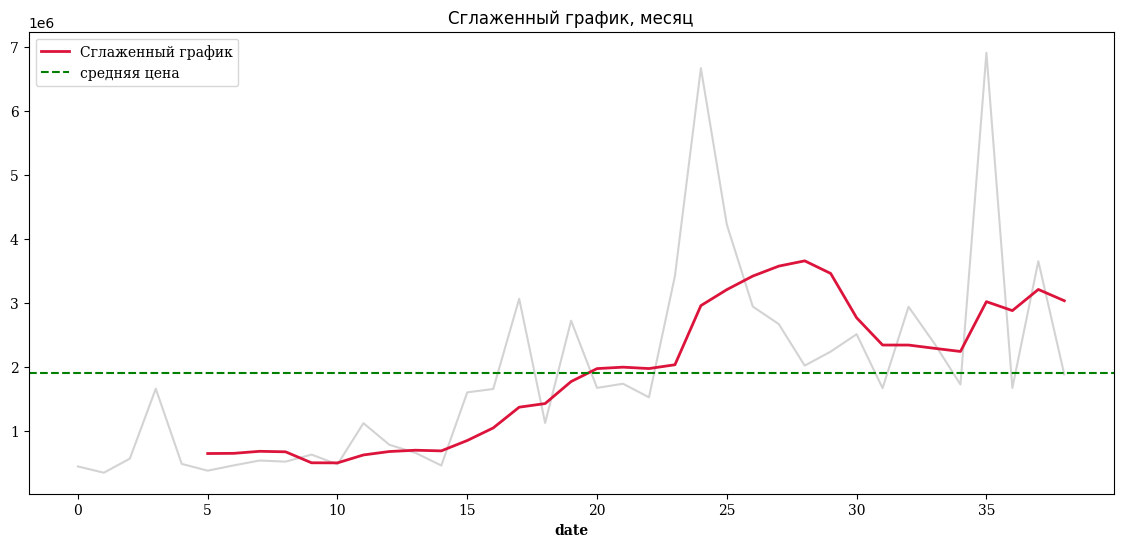

In [ ]:
plt.figure(figsize=(14, 6))
# основной график продаж
(
    sns.lineplot(df_graph['OrderLinePriceOfLine = Конечная цена'],
                 color='lightgrey')
    )

# график продаж со скользящим средним (14 дней)
(
    sns.lineplot(df_graph['OrderLinePriceOfLine = Конечная цена']
                 .rolling(6)
                 .mean(),
                 label='Сглаженный график',
                 color='crimson',
                 linewidth=2)
    )

# линия средней дневной продажи
(
    plt.axhline(
                y=df_graph['OrderLinePriceOfLine = Конечная цена'].mean(),
                linestyle='--',
                label='средняя цена',
                color='green',
                linewidth=1.5)
    )

# легенда
plt.legend(prop={'family':'serif'})

# название графика
plt.title('Сглаженный график, месяц')

# настройка осей графика
plt.xlabel('date', fontfamily='serif', fontweight='bold')
plt.ylabel('')
plt.xticks(fontfamily='serif')
plt.yticks(fontfamily='serif')

plt.show()

При условии сглаживания в 6 месяцев, график выглядит так

Виден четкий тренд на приростание

Рассмотрим, как менялась сумма сбора по дням

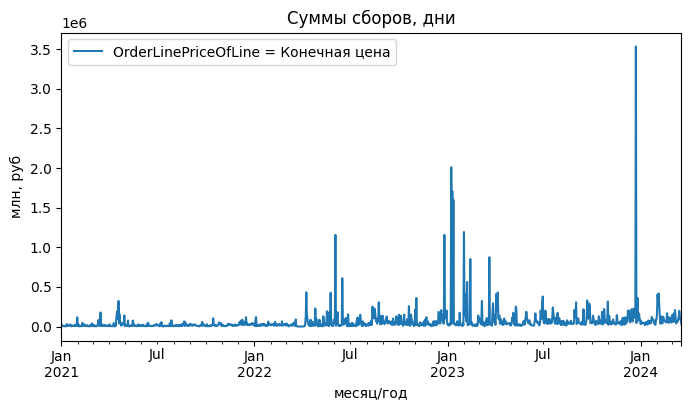

In [ ]:
df_graph=df_comp1.groupby('max_d')['OrderLinePriceOfLine = Конечная цена'].sum().reset_index()

df_graph.plot(
    x='max_d',
    y='OrderLinePriceOfLine = Конечная цена',
    kind='line',
    figsize=(8, 4),
    title='Суммы сборов, дни')
plt.xlabel('месяц/год')
plt.ylabel('млн, руб')
plt.show()


Виден восходящий тренд с несколькими четкими пиками, сгладим немного график

In [ ]:
df_graph['max_d']=df_graph['max_d'].dt.to_timestamp()
df_graph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   max_d                                 1157 non-null   datetime64[ns]
 1   OrderLinePriceOfLine = Конечная цена  1157 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 18.2 KB


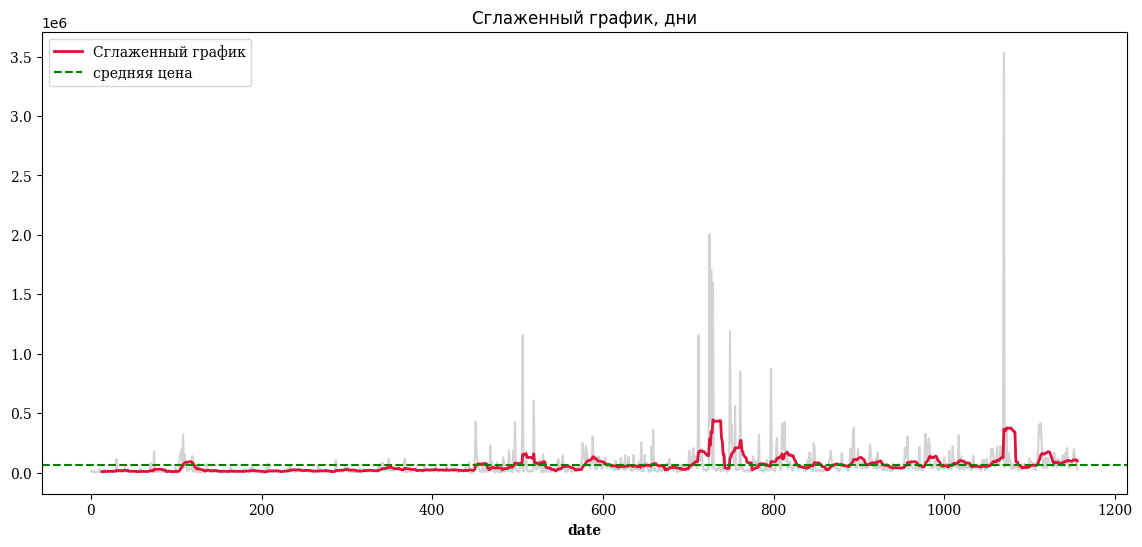

In [ ]:
plt.figure(figsize=(14, 6))
# основной график продаж
(
    sns.lineplot(df_graph['OrderLinePriceOfLine = Конечная цена'],
                 color='lightgrey')
    )

# график продаж со скользящим средним (14 дней)
(
    sns.lineplot(df_graph['OrderLinePriceOfLine = Конечная цена']
                 .rolling(14)
                 .mean(),
                 label='Сглаженный график',
                 color='crimson',
                 linewidth=2)
    )

# линия средней дневной продажи
(
    plt.axhline(
                y=df_graph['OrderLinePriceOfLine = Конечная цена'].mean(),
                linestyle='--',
                label='средняя цена',
                color='green',
                linewidth=1.5)
    )

# легенда
plt.legend(prop={'family':'serif'})

# название графика
plt.title('Сглаженный график, дни')

# настройка осей графика
plt.xlabel('date', fontfamily='serif', fontweight='bold')
plt.ylabel('')
plt.xticks(fontfamily='serif')
plt.yticks(fontfamily='serif')

plt.show()

## RFM - анализ (по channels.csv)

Проанализируем таблицу channels.csv

In [ ]:
df_ch=pd.read_pickle('/content/drive/MyDrive/AiF/channels.pkl')
df_ch.head(10).style

In [ ]:
df_ch.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2864953 entries, 0 to 873421
Data columns (total 8 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   user_action   object
 1   action_date   object
 2   channel_id    int64 
 3   utm_campaign  object
 4   utm_source    object
 5   utm_medium    object
 6   user_id       int64 
 7   action_time   int32 
dtypes: int32(1), int64(2), object(5)
memory usage: 185.8+ MB


In [ ]:
ua_s=df_ch.groupby('user_action').count().reset_index()['user_action']
ua_s.unique()

array(['(копия, исправлено ТП) Спасибо за пожертвование. Новогодняя акция. 2',
       '(копия, исправлено ТП) Спасибо за пожертвование. Новогодняя акция. 2 Клик',
       '(копия, исправлено ТП) Спасибо за пожертвование. Новогодняя акция. 2 Не доставлено',
       ..., 'Этот редкий частый муковисцидоз Не доставлено',
       'Этот редкий частый муковисцидоз Открытие',
       'Этот редкий частый муковисцидоз Отправка'], dtype=object)

In [ ]:
df_ch.groupby('user_action').count().info()

<class 'pandas.core.frame.DataFrame'>
Index: 1752 entries, (копия, исправлено ТП) Спасибо за пожертвование. Новогодняя акция. 2 to Этот редкий частый муковисцидоз Отправка
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   action_date   1752 non-null   int64
 1   channel_id    1752 non-null   int64
 2   utm_campaign  1752 non-null   int64
 3   utm_source    1752 non-null   int64
 4   utm_medium    1752 non-null   int64
 5   user_id       1752 non-null   int64
 6   action_time   1752 non-null   int64
dtypes: int64(7)
memory usage: 109.5+ KB


In [ ]:
ua_s.tolist()

['(копия, исправлено ТП) Спасибо за пожертвование. Новогодняя акция. 2',
 '(копия, исправлено ТП) Спасибо за пожертвование. Новогодняя акция. 2 Клик',
 '(копия, исправлено ТП) Спасибо за пожертвование. Новогодняя акция. 2 Не доставлено',
 '(копия, исправлено ТП) Спасибо за пожертвование. Новогодняя акция. 2 Не отправлялось',
 '(копия, исправлено ТП) Спасибо за пожертвование. Новогодняя акция. 2 Открытие',
 '(копия, исправлено ТП) Спасибо за пожертвование. Новогодняя акция. 2 Отправка',
 'DOI (копия, исправлено ТП) Спасибо за пожертвование. Новогодняя акция. 2',
 'DOI (копия, исправлено ТП) Спасибо за пожертвование. Новогодняя акция. 2 Запрос отписки',
 'DOI (копия, исправлено ТП) Спасибо за пожертвование. Новогодняя акция. 2 Клик',
 'DOI (копия, исправлено ТП) Спасибо за пожертвование. Новогодняя акция. 2 Не доставлено',
 'DOI (копия, исправлено ТП) Спасибо за пожертвование. Новогодняя акция. 2 Не отправлялось',
 'DOI (копия, исправлено ТП) Спасибо за пожертвование. Новогодняя акция. 2

In [ ]:
#это для анализа csv файла в libre
import csv

with open('/content/drive/MyDrive/AiF/output.csv', 'w', newline='') as f:
 csv_writer = csv.writer(f)
 csv_writer.writerows(ua_s)

Аанализ столбца user_action

1.
  * 'Клик — 1500р',
  * 'Клик — 3000р',
  * 'Клик — SberPay',
  * 'Клик — Банковская карта',
  * 'Клик — Вконтакте',
  * 'Клик — Одноклассники',
  * 'Клик — Реквизиты',
  * 'Клик — СБП',
  * 'Клик — СМС',
  * 'Клик — Хочу помочь',
  * 'Клик — Ютюб',
  * 'Клик — Яндекс.Дзен',
  * 'Клик — пожертвование 1000р',
  * 'Клик — пожертвование 200р',
  * 'Клик — пожертвование 300р',
  * 'Клик — пожертвование 500р',
  * 'Клик — телеграмм

2. Запрос отписки
3. Клик
4. Не доставлено

In [ ]:
# поле ['action_date'] имеет тип object
# переведем его в тип date
df_ch['action_date']=pd.to_datetime(df_ch['action_date'])
df_ch['year']=df_ch['action_date'].dt.to_period("Y")
df_ch['month']=df_ch['action_date'].dt.to_period("M")

In [ ]:
# Выведем все значения, где есть 'Клик -'
df_ch['user_action']=df_ch['user_action'].str.lower()

In [ ]:
str_click='клик —'
df_click=df_ch[df_ch['user_action'].str.contains(str_click)]
df_click.head(10).style

Для RFM анализа необходимо знать,
R - как давно были сделаны платежи

Удалим из df_click те строки, где отсуствует сумма пожертвований (в названии нет 0)

In [ ]:
str_click='0р'
df_click=df_click[df_click['user_action'].str.contains(str_click)]
df_click.head(10).style

Ок, остались только те строки, которые содержат информацию о кликах с денежными средствами

Проанализируем, как в процентном соотношении распределены суммы взносов

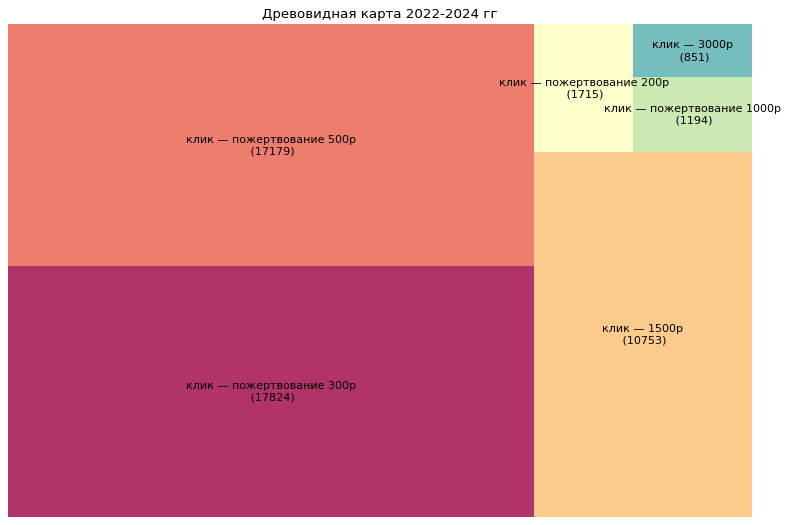

In [ ]:

 # Prepare Data
df = df_click.groupby('user_action')['user_action'].count().sort_values(ascending=False).reset_index(name='sum')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['sum'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

  # Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

  # Decorate
plt.title(('Древовидная карта 2022-2024 гг'))
plt.axis('off')
plt.show()

Чаще всего сумма сбора равняется 300 р., затем - 500 р., затем - 1500 р.

Эти три позиции суммарно закрывают 92,4% всех сборов по количеству

Рассмотрим, как менялась сумма пожертвований по временным отрезкам

In [ ]:
df_click['year'].unique()

<PeriodArray>
['2023', '2022', '2024']
Length: 3, dtype: period[A-DEC]

Вот так - в 2021 году не было ни одной операции с текстом "Клик"

Проверим, насколько это верно

In [ ]:
df_ch[df_ch['year']=='2021'].reset_index(drop=True).head()

user_action action_date  channel_id utm_campaign utm_source utm_medium  \
0  оплата заказа  2021-10-14           1          NaN        NaN        NaN   
1  оплата заказа  2021-03-18           1          NaN        NaN        NaN   
2  оплата заказа  2021-06-16           1          NaN        NaN        NaN   
3  оплата заказа  2021-03-16           1          NaN        NaN        NaN   
4  оплата заказа  2021-09-20           1          NaN        NaN        NaN   

   user_id  action_time  year    month  
0     2734           15  2021  2021-10  
1     2734           10  2021  2021-03  
2     2847           23  2021  2021-06  
3     2861           12  2021  2021-03  
4     2861           14  2021  2021-09

Поле user_action содержит информацию о проведенных транзакциях.

Рассмотрим, какие уникальные значения оно содержит

In [ ]:
df_ch[df_ch['year']=='2021'].reset_index(drop=True)['user_action'].unique()

array(['оплата заказа'], dtype=object)

In [ ]:
df_ch[df_ch['year']=='2021'].reset_index(drop=True)['user_action'].nunique()

1

In [ ]:
len(df_ch[df_ch['year']=='2021'].reset_index(drop=True)['user_action'])

9581

Действительно, в 2021 году статусы о проведенных транзакциях содержат единственное значение "оплата заказа" без суммы, во всех 9581 строках

Взглянем на суммы пожертвований в разные годы.

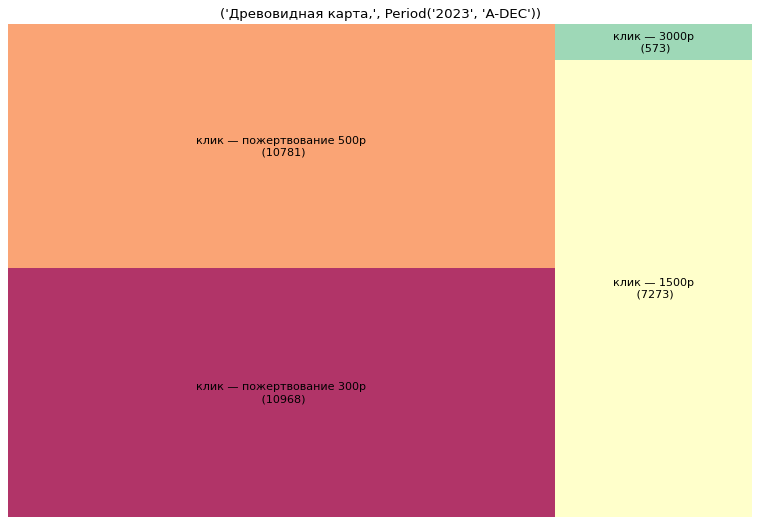

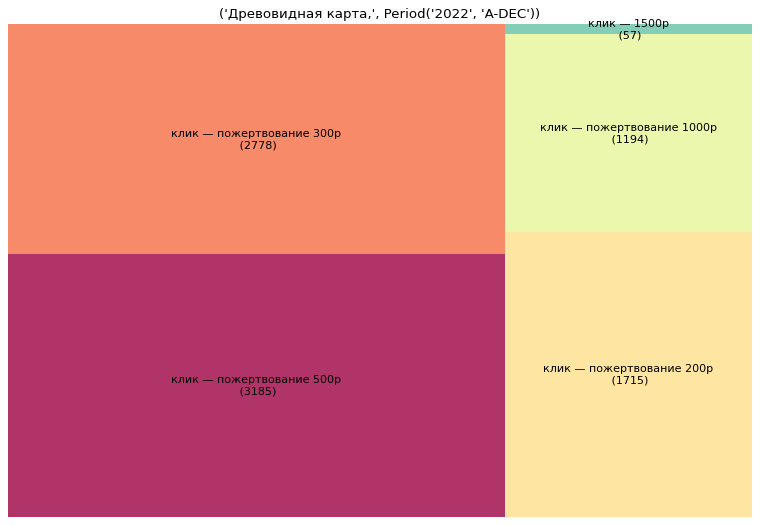

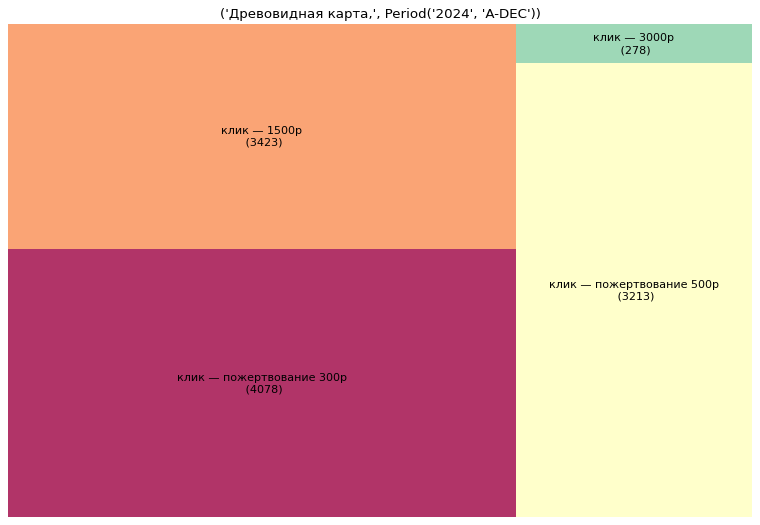

In [ ]:
for k in (df_click['year'].unique()):
  # Prepare Data
  df = df_click[df_click['year']==k].groupby('user_action')['user_action'].count().sort_values(ascending=False).reset_index(name='sum')
  labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
  sizes = df['sum'].values.tolist()
  colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

  # Draw Plot
  plt.figure(figsize=(12,8), dpi= 80)
  squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

  # Decorate
  plt.title(('Древовидная карта,', k))
  plt.axis('off')
  print()
  plt.show()

### RFM-анализ (справка)

**RFM-анализ — метод анализа, позволяющий сегментировать клиентов по частоте и сумме взносов и выявлять тех, которые приносят больше денег.**

Аббревиатура RFM расшифровывается:
- **Recency — давность** (как давно ваши клиенты совершали покупку/делали взнос). Высокий показатель давности означает, что у клиента уже сложилось достаточно хорошее впечатление о Вас, поэтому он недавно посещал Вас. Давность в срезе клиентской базы можно посмотреть, если отсортировать клиентов по дате последней покупки.
- **Frequency — частота** (как часто они у Вас покупают/делают взносы). Высокий показатель частоты говорит о том, что клиенту нравится работать с Вами, поэтому он часто к Вам возвращается.
- **Monetary — деньги** (общая сумма трат). Высокий уровень этого показателя означает, что клиенту нравится тратить/делать взносы именно у вас

Сегментируем базу по покупательской активности. Делим её на группы, чтобы узнать, как часто клиенты покупают и сколько тратят. Анализируем по трём параметрам:

- время с момента последней покупки — «recency»;
- частота заказов — «frequency»;
- сумма заказа — «monetary».

In [ ]:
df_or.columns=df_or.columns.str.lower()
df_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73763 entries, 0 to 73762
Data columns (total 24 columns):
 #   Column                                                                       Non-Null Count  Dtype         
---  ------                                                                       --------------  -----         
 0   orderidsmindboxid = идентификатор mindbox                                    73763 non-null  int64         
 1   orderfirstactionidsmindboxid = идентификатор mindbox                         73763 non-null  int64         
 2   orderfirstactiondatetimeutc = дата и время оформления заказа по utc          73763 non-null  datetime64[ns]
 3   orderfirstactionchannelidsmindboxid = идентификатор mindbox                  73763 non-null  int64         
 4   orderfirstactionchannelidsexternalid = внешний идентификатор точки контакта  73763 non-null  object        
 5   orderfirstactionchannelname = имя точки контакта                             73763 non-null  ob

In [ ]:
#переименовать 9 столбец удалось только таким способом
# час жизни

column_labels_index = {
                df_or.columns[9]: 'order_number',
                df_or.columns[2]:'order_date',
                df_or.columns[20]:'user_id'
                }

df_or.rename(columns=column_labels_index, inplace=True)

Информация о сумме платежа или стоиомсти зашита в трех разных столбцах:
- 'ordertotalprice = стоимость заказа',
- 'orderlinebasepriceperitem = базовая цена продукта за единицу продукта',
- 'orderlinepriceofline = конечная цена'

Рассмотрим таблицу, состоящую из этих столбцов, а так же добавим туда столбцы
- 'order_date',
- 'orderlinestatusidsexternalid = идентификатор статуса позиции заказа'


In [ ]:
k=df_or[['ordertotalprice = стоимость заказа','orderlinebasepriceperitem = базовая цена продукта за единицу продукта',
         'orderlinepriceofline = конечная цена', 'order_date',
         'orderlinestatusidsexternalid = идентификатор статуса позиции заказа']]

Столбец 'orderlinestatusidsexternalid = идентификатор статуса позиции заказа' имеет три разных значения

In [ ]:
k['orderlinestatusidsexternalid = идентификатор статуса позиции заказа'].unique()

array(['Paid', 'fail', 'notpaid'], dtype=object)

Нас интересуют только те строки, в которых статус заказа имеет значение Paid

In [ ]:
k[k['orderlinestatusidsexternalid = идентификатор статуса позиции заказа']=='Paid'].sort_values(by='ordertotalprice = стоимость заказа')

ordertotalprice = стоимость заказа  \
52767                                   0   
34235                                   0   
34234                                   0   
24495                                   0   
70060                                   0   
...                                   ...   
19533                              100000   
4124                               100000   
64859                              115000   
18609                              160000   
23609                              200000   

       orderlinebasepriceperitem = базовая цена продукта за единицу продукта  \
52767                                                0.0                       
34235                                                0.0                       
34234                                                0.0                       
24495                                              300.0                       
70060                                              500.0                       
...                                                  ...                       
19533                                                NaN                       
4124                                                 NaN                       
64859                                           115000.0                       
18609                                                NaN                       
23609                                                NaN                       

       orderlinepriceofline = конечная цена          order_date  \
52767                                     0 2023-04-13 11:13:00   
34235                                     0 2022-07-03 07:05:00   
34234                                     0 2022-07-03 06:48:00   
24495                                   300 2024-01-24 13:29:00   
70060                                   500 2024-01-21 13:28:00   
...                                     ...                 ...   
19533                                100000 2021-04-30 00:00:00   
4124                                 100000 2021-01-31 00:00:00   
64859                                115000 2023-12-08 11:55:00   
18609                                160000 2021-03-16 00:00:00   
23609                                200000 2021-04-19 00:00:00   

      orderlinestatusidsexternalid = идентификатор статуса позиции заказа  
52767                                               Paid                   
34235                                               Paid                   
34234                                               Paid                   
24495                                               Paid                   
70060                                               Paid                   
...                                                  ...                   
19533                                               Paid                   
4124                                                Paid                   
64859                                               Paid                   
18609                                               Paid                   
23609                                               Paid                   

[52058 rows x 5 columns]

Теперь мы видим, что возможны три ситуации:
1. "ordertotalprice = стоимость заказа"=0
2. "orderlinebasepriceperitem = базовая цена продукта за единицу продукта" = 0 / NaN
3. "orderlinepriceofline = конечная цена" = 0

Исходя из того, что идентификатор статуса позиции закза = Paid, оплата заказа произошла. Следовательно можем использовать либо 1, либо 3 столбец

Расмотрим какая существует разница

In [ ]:
k['ordertotalprice = стоимость заказа'].isna().sum()

0

In [ ]:
k['orderlinepriceofline = конечная цена'].isna().sum()

0

В обеих столбцах нет пропущенных значений

Рассмотрим, сколько положительных значений содержится в каждом столбце

In [ ]:
k[k['ordertotalprice = стоимость заказа']>0]['ordertotalprice = стоимость заказа'].count()

66272

In [ ]:
k[k['orderlinepriceofline = конечная цена']>0]['orderlinepriceofline = конечная цена'].count()

73620

В 3-ем столбце больше положительных значений, следовательно будем считать, что сумма платежей содержится в столбце 'orderlinepriceofline = конечная цена'

In [ ]:
# отберем только те строки, где
# "orderlinestatusidsexternalid = идентификатор статуса позиции заказа"=Paid и "'orderlinepriceofline = конечная цена" >0
df_RFM=df_or[(df_or['orderlinestatusidsexternalid = идентификатор статуса позиции заказа']=='Paid') & (df_or['orderlinepriceofline = конечная цена']>0)]

Отберем те столбцы, которые нам необходимы

In [ ]:
temp=['user_id', 'order_number',
      'order_date',
      'orderlinepriceofline = конечная цена']
RFM_data=df_RFM[temp]
RFM_data.shape

(51989, 4)

In [ ]:
RFM_data

user_id order_number          order_date  \
0         6959   1002892689 2022-01-27 00:00:00   
1         7103   1004662779 2022-01-29 00:00:00   
2         7321   1006728077 2022-01-31 00:00:00   
3         7143   1011786329 2022-02-06 00:00:00   
4         7079   1037151115 2022-02-28 00:00:00   
...        ...          ...                 ...   
73752    46782       136335 2024-03-18 06:16:00   
73754    46783       136340 2024-03-18 06:54:00   
73755    46784       136344 2024-03-18 07:25:00   
73761    46787       136380 2024-03-18 11:43:00   
73762    46789       136381 2024-03-18 12:03:00   

       orderlinepriceofline = конечная цена  
0                                       500  
1                                       200  
2                                       300  
3                                       300  
4                                        50  
...                                     ...  
73752                                   500  
73754                                   120  
73755                                   300  
73761                                   300  
73762                                   150  

[51989 rows x 4 columns]

Найдем, когда был сделан последний платеж

In [ ]:
RFM_data['order_date'].max()

Timestamp('2024-03-18 12:03:00')

Последний заказ был сделан 18 марта 2024 года, эту дату примем за NOW

In [ ]:
NOW = dt.datetime(2024,3,19)
#Convert max_d to datetime format.
RFM_data['order_date'] = pd.to_datetime(RFM_data['order_date'])
# RFM Table
RFM_table=RFM_data.groupby('user_id').agg({'order_date': lambda x: (NOW - x.max()).days, # Recency, ставлю max, т.к. смотрим последнее появление user_id
                                                'order_number': lambda x: len(x.unique()), # Frequency
                                                'orderlinepriceofline = конечная цена': lambda x: x.sum()})    # Monetary

RFM_table['order_date'] = RFM_table['order_date'].astype(int)

RFM_table.rename(columns={'order_date': 'recency',
                         'order_number': 'frequency',
                         'orderlinepriceofline = конечная цена': 'monetary'}, inplace=True)
RFM_table=RFM_table.reset_index()
RFM_table.head().style

<ipython-input-76-c5bed6abea53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_data['order_date'] = pd.to_datetime(RFM_data['order_date'])


### RFM - перцентили
Проанализируем, как перцентили распределены по RFM показателям



#### Показатели Recency и Frequency
Построим диаграмму рассеяния, чтобы увидеть как взаимосвязанны эти две величины

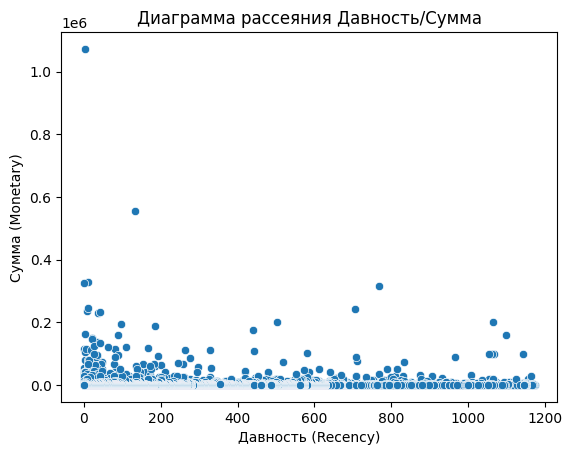

In [ ]:
sns.scatterplot(data=RFM_table,
                x="recency",
                y="monetary")
plt.title('Диаграмма рассеяния Давность/Сумма')
plt.xlabel('Давность (Recency)')
plt.ylabel('Сумма (Monetary)')
plt.show()

Видим, что показатель R - давность равномерно распределен на протяжении всего периода исследования. Поэтому для показателя R используем функцию pd.qcut. Она позволит равномерно распределить сборы внутри показателя.



#### R - recency

In [ ]:
# recency

RFM_table['r_quartile']=pd.qcut(RFM_table['recency'],
        labels=['3', '2', '1'],
        q=3).astype(str)


#### M-monetary

По показателю Сумма (Monetary) оценить распределение мешают аномалии выбросы. Проанализируем, как они распределены с помощью "ящика с усами" и функции describe

In [ ]:
perc=[0.25, 0.8, 0.95]
RFM_table['monetary'].describe(perc).apply(lambda x: format(x, 'f'))

count      18652.000000
mean        2099.738098
std        12810.223976
min            1.000000
25%          300.000000
50%          500.000000
80%         1500.000000
95%         6500.000000
max      1072500.000000
Name: monetary, dtype: object

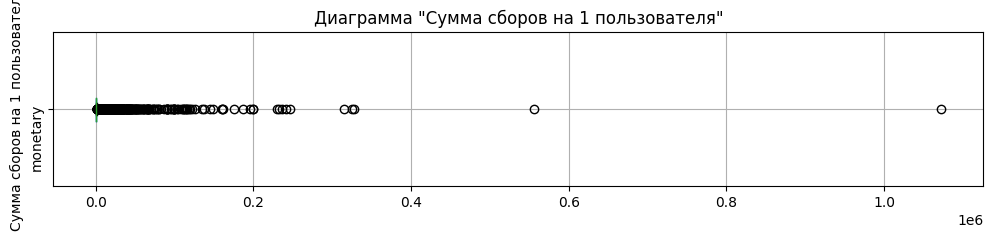

In [ ]:
RFM_table.boxplot(column=['monetary'],
           figsize = (12, 2),
                       rot = 90,
                      vert = False)
plt.title('Диаграмма "Сумма сборов на 1 пользователя"')
plt.ylabel('Сумма сборов на 1 пользователя')
plt.show()

Исходя из принципа Парето, 80% взносов не превышает по стоимости 1500,0

Так же видим, что выбросы становятся редкими после 20 000.

Построим диаграмму рассеяния при условии, что monetary < 20 000.

Так же добавим для визуализации на график две линии, равные 80% и 95% сумм покупок

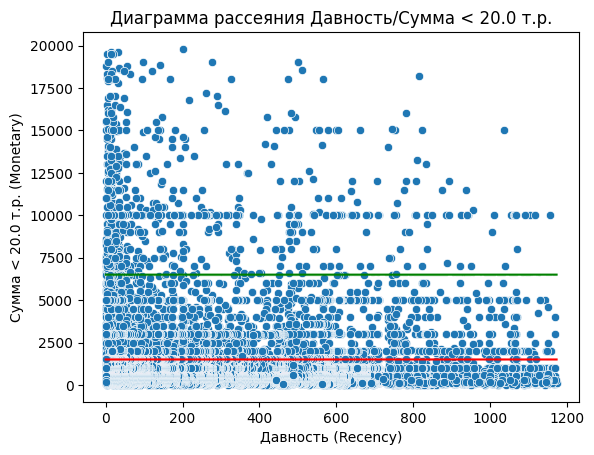

In [ ]:
sns.scatterplot(data=RFM_table[RFM_table['monetary']<20000],
                x="recency",
                y="monetary")
sns.lineplot( data=RFM_table[RFM_table['monetary']<20000], x="recency", y=1500, color='Red')
sns.lineplot( data=RFM_table[RFM_table['monetary']<20000], x="recency", y=6500, color='Green')
plt.title('Диаграмма рассеяния Давность/Сумма < 20.0 т.р.')
plt.xlabel('Давность (Recency)')
plt.ylabel('Сумма < 20.0 т.р. (Monetary)')
plt.show()

Видно, что основные суммы сборов расположены ниже зеленой линии, т.е. меньше 6500 руб (95%). Можем отдельно выделить взносы, соответствующие закону ровных чисел - 10,0 и 15,0 тыс.руб

Примем **распределение показателя monetary** следующим образом:
1. Взносы от 0 до 1500 = '1'
2. Взносы от 1500 до 6500 = '2'
3. Остальные взносы = '3'

In [ ]:
#m_quartile
for m in range(len(RFM_table['monetary'])):
    if 0 < RFM_table.loc[m,'monetary'] <1500:
        RFM_table.loc[m,'m_quartile']='1'
    elif 1500<=  RFM_table.loc[m,'monetary'] <6500:
        RFM_table.loc[m,'m_quartile']='2'
    else:
        RFM_table.loc[m,'m_quartile']='3'

#### F-frequency


In [ ]:
perc=[0.25, 0.8, 0.90]
RFM_table['frequency'].describe(perc)

count    18652.000000
mean         2.787315
std          5.907129
min          1.000000
25%          1.000000
50%          1.000000
80%          2.000000
90%          5.000000
max        157.000000
Name: frequency, dtype: float64

Опять же в показатели frequency невозможно применить функцию распределения pd.cut, т.к. очень много значений равных 1

Проанализируем, как распределена частота сборов

In [ ]:
freq=RFM_table['frequency'].value_counts().reset_index()
freq['perc']=round(freq['count']/freq['count'].sum()*100,2)
freq

frequency  count   perc
0           1  12830  68.79
1           2   2233  11.97
2           3    883   4.73
3           4    526   2.82
4           5    367   1.97
..        ...    ...    ...
76         90      1   0.01
77        104      1   0.01
78         61      1   0.01
79         58      1   0.01
80         52      1   0.01

[81 rows x 3 columns]

Опять же, исходя из принципа Паретто, лежащего в основе метода категоризации, можно распределить следующим образом

1. 1-2 взноса - 1
2. 3-5 взносов - 2
3. более 5 взносов - 3

In [ ]:
#f_quartile
for m in range(len(RFM_table['frequency'])):
  if 1 <= RFM_table.loc[m,'frequency'] <=2:
    RFM_table.loc[m,'f_quartile']='1'
  elif 3<= RFM_table.loc[m,'frequency'] <=5:
    RFM_table.loc[m,'f_quartile']='2'
  else:
    RFM_table.loc[m,'f_quartile']='3'

### RFM - таблица
Соберем RFM-таблицу

In [ ]:
RFM_table['rfm_class'] = RFM_table['r_quartile'] + RFM_table['f_quartile'] + RFM_table['m_quartile']



RFM_table.head(10).style

Проанализируем, количество записей в каждом сегменте


In [ ]:
rfm_class_count=RFM_table['rfm_class'].value_counts().sort_values(ascending=False).reset_index()
rfm_class_count['perc']=round(rfm_class_count['count']/rfm_class_count['count'].sum(),4)*100
rfm_class_count

rfm_class  count   perc
0        111   5251  28.15
1        211   4485  24.05
2        311   3429  18.38
3        212    724   3.88
4        332    641   3.44
5        321    528   2.83
6        312    496   2.66
7        112    462   2.48
8        333    457   2.45
9        322    349   1.87
10       221    327   1.75
11       222    222   1.19
12       331    222   1.19
13       232    182   0.98
14       121    135   0.72
15       233    101   0.54
16       113     97   0.52
17       122     90   0.48
18       231     80   0.43
19       213     72   0.39
20       323     62   0.33
21       132     52   0.28
22       313     47   0.25
23       131     42   0.23
24       223     40   0.21
25       133     36   0.19
26       123     23   0.12

Первые 6 сегментов перекрывают 80% от базы

С другой стороны - получилось 27 сегментов, в половине которых содержатся менее 200 пользователей. Целесообразно объединить некоторые категории, обладающих сходными характеристиками. В частности, можно вопользоваться одной из таблиц RFM-маркетинга, и объединить пользователей следующим образом:

<table>
  
<tr align="left">
    <th>Сегмент</th>
    <th>Поведение</th>
    <th>RFM сегменты</th>
</tr>
<tr>
    <td>Чемпионы</td>
    <td > Недавно делали взносы, делают взносы часто и больше всех</td>
    <td > 333, 332</td>
</tr>
<tr>
    <td>Лояльные</td>
    <td>Делают частые взносы на крупные суммы</td>
    <td > 331, 322, 323</td>
</tr>
<tr>
    <td>Требуют внимание</td>
    <td>Уровень давности взносов выше среднего, частота и сумма взносов на на среднем уровне.<br/>Могут не совершать взносы в последнее время</td>
    <td >  222, 213</td>
</tr>
<tr>
    <td>Растущие</td>
    <td>Недавно делали взносы, но не крупные суммы</td>
    <td > 211, 212, 321</td>
</tr>
 <tr>   
    <td>На грани</td>
    <td>Показатели давности, частоты и суммы взносов ниже средней</td>
    <td > 221, 232</td>
</tr>
<tr>
    <td>В зоне риска</td>
    <td>Ранее часто делали взносы на большие суммы, но давно не делали взносы</td>
    <td > 113, 123, 132, 133, 223, 231, 233</td>
</tr>
<tr>
    <td>Новички</td>
    <td>В последнее время совершали взносы, необязательно крупные.<br/>Низкий уровень частоты и суммы взносов, т.к. они недавностали заниматься благотоврительностью</td>
    <td >311, 312, 313</td>
</tr>
<tr>
    <td>Спящие</td>
    <td>Последний взнос была очень давно, так же низкие чек и кол-во взносов</td>
    <td >111, 112, 121, 122, 131</td>
</tr>
</table>

In [ ]:
category_dictionary = {
    'Чемпионы':['333', '332'],
    'Лояльные':['331', '322', '323'],
    'Требуют внимание':['213','222'],
    'Растущие':['211', '212','321'],
    'На грани':['221','232'],
    'В зоне риска':['113', '123', '132','133', '223', '231', '233'],
    'Новички':['311','312', '313'],
    'Спящие':['111', '112', '121', '122',  '131']
    }

def categorize_product(product):

    for category, items_of_list in category_dictionary.items():
        for item in items_of_list:
            if item in product:
                return category
    return category

RFM_table['category'] = RFM_table['rfm_class'].apply(categorize_product)

rfm_class_count_category=RFM_table['category'].value_counts().sort_values(ascending=False).reset_index()
rfm_class_count_category['perc']=round(rfm_class_count_category['count']/rfm_class_count_category['count'].sum(),4)*100
rfm_class_count_category

category  count   perc
0            Спящие   5980  32.06
1          Растущие   5737  30.76
2           Новички   3972  21.30
3          Чемпионы   1098   5.89
4          Лояльные    633   3.39
5          На грани    509   2.73
6      В зоне риска    429   2.30
7  Требуют внимание    294   1.58

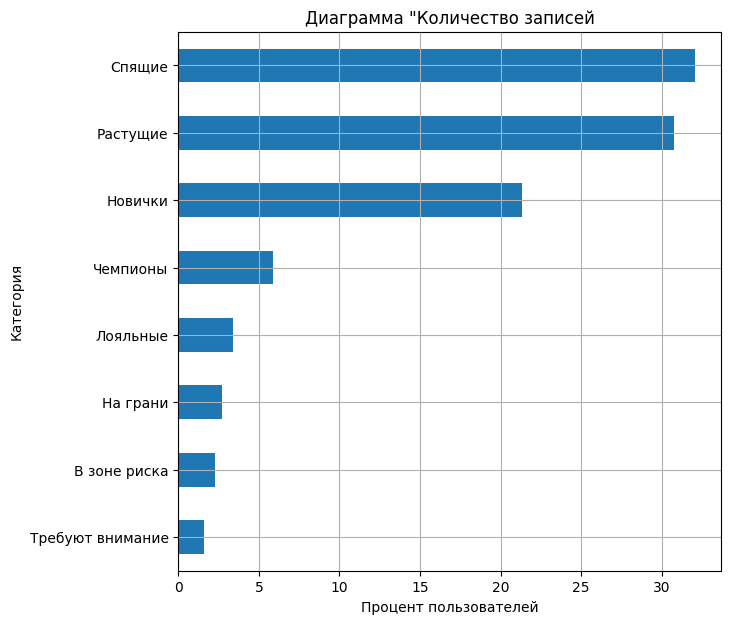

In [ ]:
rfm_class_count_category.sort_values(by='perc', ascending=True).plot( x='category',
                                                                      y='perc',
                                                                      figsize=(7,7),
                                                                      kind='barh',
                                                                      legend=False,
                                                                      grid=True
                                                                     )
plt.title('Диаграмма "Количество записей')
plt.xlabel('Процент пользователей')
plt.ylabel('Категория')
plt.show()

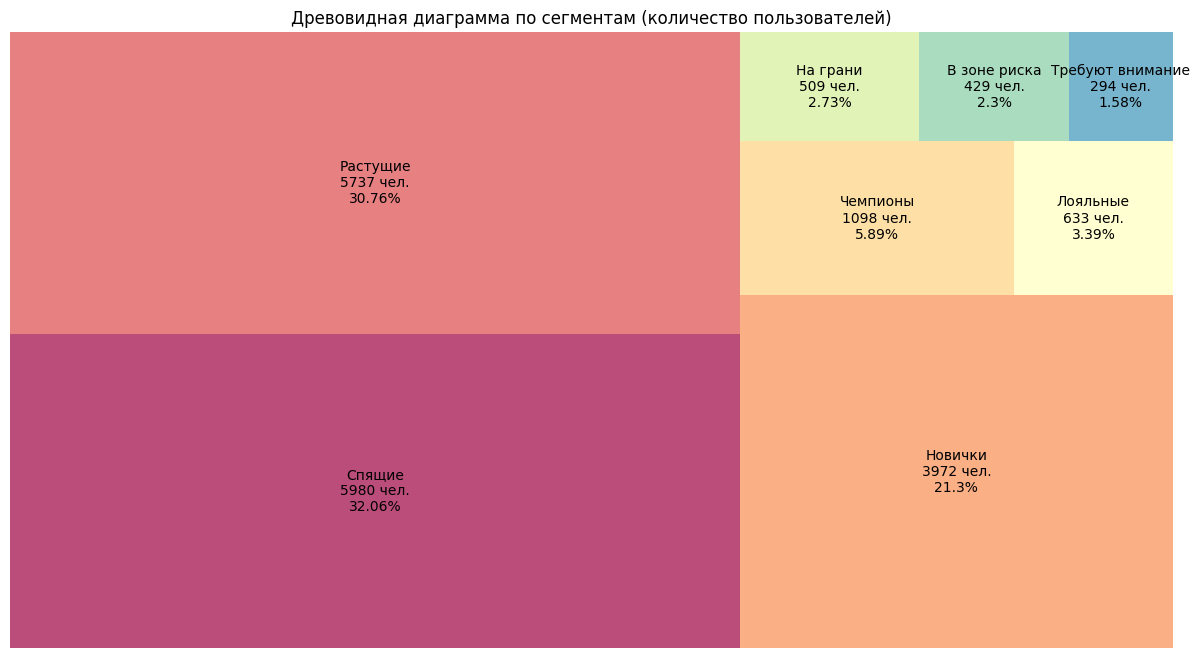

In [ ]:
# Древовидная диаграмма

df =rfm_class_count_category
labels = df.apply(lambda x: str(x[0]) + "\n" + str(x[1]) +" чел.\n" +str(round(x[2],3)) + "%", axis=1)
sizes = df['count'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(15,8), dpi= 100)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.7)

plt.title('Древовидная диаграмма по сегментам (количество пользователей)')
plt.axis('off')
plt.show()

In [ ]:
rfm_class_count_category=RFM_table.groupby('category').agg({'category':'count',
                                   'recency':'mean',    #давность
                                  'frequency': 'mean',  #частота
                                  'monetary': 'mean'   #сумма
                                  }).rename(columns={'category':'cat_count'}).sort_values(by='cat_count',
                                                                                          ascending=False)

rfm_class_count_category['perc']=round(rfm_class_count_category['cat_count']/rfm_class_count_category['cat_count'].sum(),4)*100
rfm_class_count_category

cat_count     recency  frequency      monetary   perc
category                                                               
Спящие                 5980  786.895485   1.239465    676.857860  32.06
Растущие               5737  311.372669   1.382604    695.507059  30.76
Новички                3972   62.619587   1.210977    871.470040  21.30
Чемпионы               1098   36.509107  17.698543  13597.229508   5.89
Лояльные                633   53.300158   6.443918   4505.380727   3.39
На грани                509  350.341847   6.620825   1619.094303   2.73
В зоне риска            429  561.498834   9.386946  17209.780886   2.30
Требуют внимание        294  336.251701   3.149660   5701.778912   1.58

#### Вывод по RFM таблице

1. По итогам анализа было выделено 8 категорий пользователей
2. Топ3 (Спящие, Растущие, Новички) - перекрывают 84,12% представленной пользовательской базы
3. Категория
- Спящие
  - в составе 5 980 пользователей (32,06%)
  - Средняя давность последнего взноса - 786.90 дней (больше 2 лет назад)
  - в среднем делали 1,24 взноса
  - средний чек (сумма взносов) - 676.86 руб
- Растущие
  - в составе 5 737 пользователей (30,76%)
  - Средняя давность последнего взноса - 311.37 дня
  - в среднем делали 1,38 взноса
  - средний чек (сумма взносов) - 695,51 руб
- Новички
  - в составе 3 972 пользователей (21,30%)
  - Средняя давность последнего взноса - 62.62 дня (1 раз в 2 месяца)
  - в среднем делали 1,22 взноса
  - средний чек (сумма взносов) - 871.47 руб
- Чемпионы
  - в составе 1 098 пользователя (5,89%)
  - Средняя давность последнего взноса - 36.51 дня (1 месяц назад)
  - в среднем делали 17.70 взноса (!)
  - средний чек (сумма взносов) - 13 597.23руб (!)
- Лояльные
  - в составе 633 пользователя (3,39%)
  - Средняя давность последнего взноса - 53.30 дня
  - в среднем делали 6.44 взноса
  - средний чек (сумма взносов) - 4 505.38 руб
- На грани
  - в составе 509 пользователz (2.73%)
  - Средняя давность последнего взноса - 350.34 дня
  - в среднем делали 6.62 взноса
  - средний чек (сумма взносов) - 1 619.09 руб
- В зоне риска
  - в составе 429 пользователя (2,30%)
  - Средняя давность последнего взноса - 561,50 дня
  - в среднем делали 9,39 взноса
  - средний чек (сумма взносов) - 17 209,78 руб
- Требуют внимание
  - в составе 294 пользователей (1.58%)
  - Средняя давность последнего взноса - 336,25 дня
  - в среднем делали 3,15 взноса
  - средний чек (сумма взносов) - 5 701.78 руб



3. Интересны распределения по времени (R-показатель). Из 8 групп, в 5 давность последнего взноса исчисляется годами (от 2/3 года до 2 лет), в 3 - месяцами (1-2) месяца.

4. Очень большой средний чек (средняя сумма взноса) у Чемпионов сочетается с большой частотой таких взносов - 17,69 взноса.

5. Самый большой чек у категории, находящейся в Зоне риска - 17 209,78 руб. сочетается с длительным показаетелем последнего взноса - 561,50 дня (почти 1,5 года назад)

6. Самая большая категория - Спящие, составляет около трети всех пользователей. Есть где работать и кого будить

### Категорийный анализ RFM-таблицы

Проанализируем каждую выделенную катеогрию, для этого к таблице df_or добавим колонки с категориями

In [ ]:
#собираем таблицу
data_cor_rfm=df_RFM.merge(RFM_table, on='user_id').reset_index()
data_cor_rfm=data_cor_rfm[['user_id', 'category', 'rfm_class',
                          'order_date', 'max_d', 'max_ym', 'max_y',
                          'ordercustomfieldsrecurrent = регулярный да/нет',
                          'ordercustomfieldsrepayment = повторный рекуррент',
                          'orderlineproductidswebsite = id продукта в сайт',
                          'orderlineproductname = техническое название продукта',
                          'orderlinepriceofline = конечная цена']
                          ]


### Функции обработки
Для удобства обработки напишем несколько функций

#### Таблица по годам


In [ ]:
# таблица по годам

def table_year (str_cat):
  df=data_cor_rfm[data_cor_rfm['category']==str_cat].groupby('max_y')['user_id'].count().reset_index()
  df['perc']=round(df['user_id']/df['user_id'].sum()*100, 2)
  print('Количество уникальных пользователей в категории '+str_cat, ' - ', data_cor_rfm[data_cor_rfm['category']==str_cat]['user_id'].nunique())
  return (df.style)

#### Круговая диаграмма по годам

In [ ]:
# круговая диаграмма по годам
def diag_year (str_cat):
  # выведем круговую диаграмму по годам
  df=data_cor_rfm[data_cor_rfm['category']==str_cat].groupby('max_y')['user_id'].count().reset_index()
  # Draw Plot
  fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

  data = df['user_id']
  categories = df['max_y']
  #explode = [0,0.1,0]

  def func(pct, allvals):
      absolute = int(pct/100.*np.sum(allvals))
      return "{:.1f}% ({:d} )".format(pct, absolute)

  wedges, texts, autotexts = ax.pie(data,
                                    autopct=lambda pct: func(pct, data),
                                    textprops=dict(color="w"),
                                    colors=plt.cm.Dark2.colors,
                                  startangle=140)

  # Decoration
  ax.legend(wedges, categories, title="Годы", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
  plt.setp(autotexts, size=10, weight=700)
  ax.set_title(str_cat+ ", по годам")
  plt.show()

#### Данные по месяцам


In [ ]:
 #данные по месяцам
def table_month(str_cat):
  df=data_cor_rfm[data_cor_rfm['category']==str_cat].groupby('max_ym')['user_id'].count().reset_index()
  return (df.head(10).style)


#### Диаграмма bar по месяцам

In [ ]:
#диаграмма bar по месяцам
def diag_month (str_cat):
  df=data_cor_rfm[data_cor_rfm['category']==str_cat].groupby('max_ym')['user_id'].count().reset_index()
  #находим среднее значение для графика
  data_cor_rfm_saleS_mean=round(df['user_id'].mean(),0)

  #находим медианное значение для графика
  data_cor_rfm_saleS_median=round(df['user_id'].median(),0)

  # график количество пользователей по месяцам
  df.plot(x='max_ym',
          y='user_id',
          kind='bar',
          legend=False,
          grid=True)

  #линия  среднего на графике
  plt.axhline(y = data_cor_rfm_saleS_mean, color = 'r', linestyle = '-')

  #линия  медианы на графике
  plt.axhline(y = data_cor_rfm_saleS_median, color = 'g', linestyle = '-')


  plt.title('Диаграмма R-количество пользователей '+str_cat+ '\n (среднее количество пользователей = '+str(data_cor_rfm_saleS_mean)+')\n(медианное количество пользователей = '+str(data_cor_rfm_saleS_median)+')')
  plt.xlabel('Месяц, год')
  plt.ylabel('Кол-во пользователей')
  plt.show()

#### F-диаграмма

In [ ]:
def diag_f (str_cat):
  df=data_cor_rfm[data_cor_rfm['category']==str_cat].groupby('user_id')['orderlinepriceofline = конечная цена'].count().reset_index().groupby('orderlinepriceofline = конечная цена')['user_id'].count().reset_index()
  df.plot(kind='scatter',
          x='orderlinepriceofline = конечная цена',
          y='user_id',
          s=50,
          alpha=.8,
          title='Диаграмма F-количество '+str_cat+'/количество взносов\n F-frequency, частота взносов',
          figsize=(21,5)
          )
  #plt.gca().spines[['top', 'right',]].set_visible(True)

  plt.xlabel('Месяц, год')
  plt.ylabel('Количество взносов')
  plt.show()

#### Таблица F-диаграмм

In [ ]:
def table_f (str_cat):
  df=data_cor_rfm[data_cor_rfm['category']==str_cat].groupby('user_id')['orderlinepriceofline = конечная цена'].count().reset_index().groupby('orderlinepriceofline = конечная цена')['user_id'].count().reset_index()
  df['perc']= round(df['user_id']/df['user_id'].sum()*100, 2)
  return (df.style)

#### M-диаграмма

In [ ]:
def diag_m (str_cat):
  df=data_cor_rfm[data_cor_rfm['category']==str_cat].groupby('orderlinepriceofline = конечная цена')['user_id'].count().reset_index().sort_values(by='user_id', ascending=False).reset_index(drop= True )
  df['perc']=round(df['user_id']/df['user_id'].sum()*100, 2)
  df.head(10).sort_values(by='perc', ascending=True).plot(kind='barh',
                                                        x='orderlinepriceofline = конечная цена',
                                                        y='perc',
                                                        title='Диаграмма M-количество '+str_cat+' Сумма взносов/процент пользователей\n M-monetary, сумма взносов из TOП 10'
                                                        )
  plt.xlabel('Процент пользователей, ТОП 10')
  plt.ylabel('Количество пользователей')
  plt.show()
  return df.describe()

#### Таблица M-диаграмма

In [ ]:
def table_m(str_cat):
  df=data_cor_rfm[data_cor_rfm['category']==str_cat].groupby('orderlinepriceofline = конечная цена')['user_id'].count().reset_index().sort_values(by='user_id', ascending=False).reset_index(drop= True )
  df['perc']=round(df['user_id']/df['user_id'].sum()*100, 2)
  return(df.head(10).style)

### Анализ по категориям

#### Спящие

Проанализируем категорию Спящие

In [ ]:
str_cat='Спящие'
table_year (str_cat)

Количество уникальных пользователей в категории Спящие  -  5980


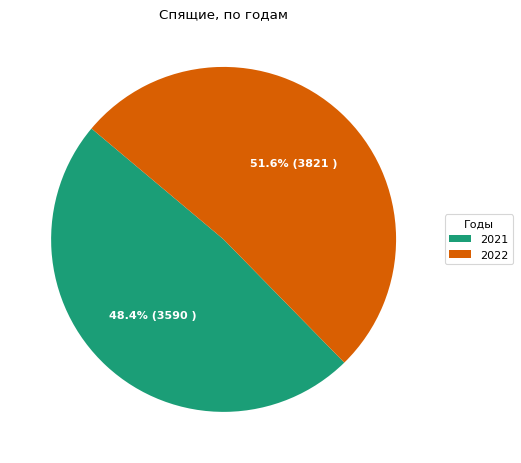

In [ ]:
diag_year(str_cat)

Пользователи из категории "Спящие" - примерно поровну распределены по 2021 и 2022 годам

Проанализируем как Спящие распределены по месяцам

In [ ]:
table_month(str_cat)

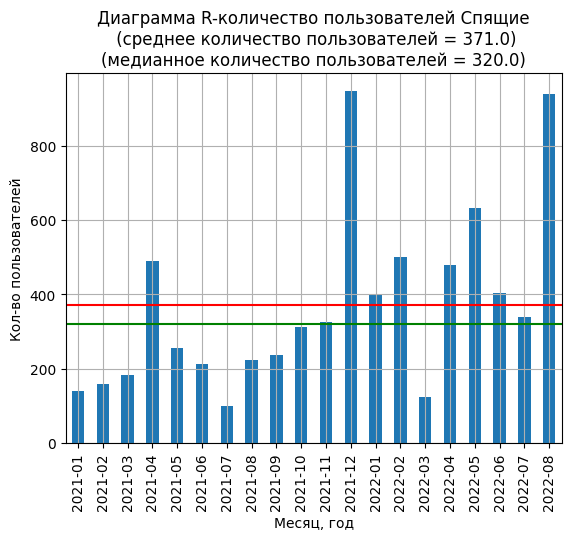

In [ ]:
diag_month (str_cat)

Можно выделить три периода, когда активность пользователей была особенно высокой относительно соседних периодов: апрель 2021 года,  декабрь 2021 и  август 2022 года.

Медианное количество пользователей составляет 320 человек, а среднее — 371. Это ещё раз доказывает, что при рассмотрении R-коэффициента можно столкнуться со всплесками и аномалиями.

Рассмотрим коэффициент F- frequency, количество взносов, которые совершали пользователи из категории "Спящие"

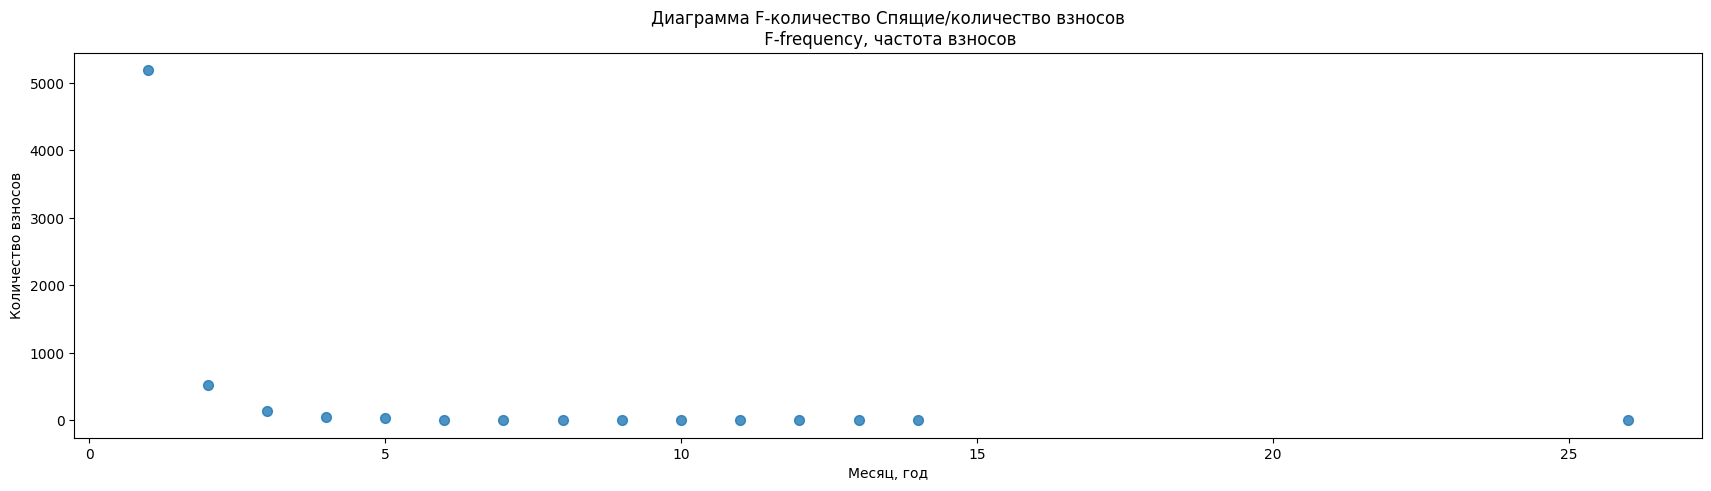

In [ ]:
diag_f (str_cat)

Как видно, взносы в категории «Спящие» в основном находятся в диапазоне от 1 до 26. При этом явными лидерами можно считать не более 2 взносов на 1 пользователя

In [ ]:
table_f(str_cat)

Давайте посмотрим, как распределены суммы взносов. - M-moneytary

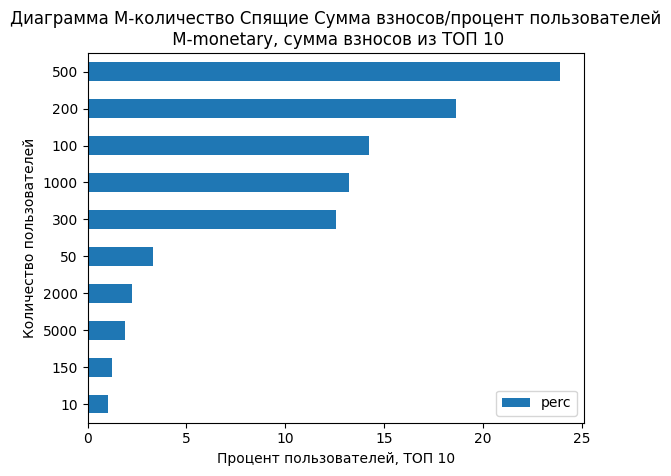

orderlinepriceofline = конечная цена      user_id        perc
count                            155.000000   155.000000  155.000000
mean                             707.470968    47.819355    0.643613
std                             1269.162989   224.459451    3.028691
min                                1.000000     1.000000    0.010000
25%                               56.000000     1.000000    0.010000
50%                              180.000000     1.000000    0.010000
75%                              578.000000     4.000000    0.050000
max                             6000.000000  1771.000000   23.890000

In [ ]:
diag_m (str_cat)

In [ ]:
table_m(str_cat)

Категория *Спящие* основные суммы взносов попадают в ТОП 5
1. 500 руб - 23,89%
2. 200 руб - 18,62%
3. 100 руб - 14.23%
4. 1000 руб - 13,24%
5. 300	руб -	12,55%

Т.о. эти взносы перекрывают более 82% базы пользоватлей.


##### **Вывод по группе "Спящие"**

1. Группа Спящие состоит из пользователей, которые ранее осуществляли взносы, но по какой-то причине перестали это делать, так же размеры взносов были незначительными
2. По RFM-таблице к Спящим относят категории 111, 112, 121, 122, 131
3. В составе 5 980 пользователей (32,06%)
4. По  времени, все транзакции распределена следующим образом:
- 2021	- 3 591 чел. (48.45%)
- 2022	- 3 821	чел. (51.55%)

5. Пользователи данной категории делали от 1 до 26 взносов
  1. 1 взнос - 5 187 (86.74%)
  2. 2 взноса	- 526	(8.80%)
  3. 3 взноса -	137	(2.29%)

Остальные группы - не более 1%



6. Сумма взносов изменяется от 1 до 6,0 тыс.руб
  1. 500 руб - 23,89%
  2. 200 руб - 18,62%
  3. 100 руб - 14.23%
  4. 1000 руб - 13,24%
  5. 300	руб -	12,55%




#### Растущие

Недавно делали взносы, но не крупные суммы

In [ ]:
str_cat='Растущие'
table_year (str_cat)

Количество уникальных пользователей в категории Растущие  -  5737


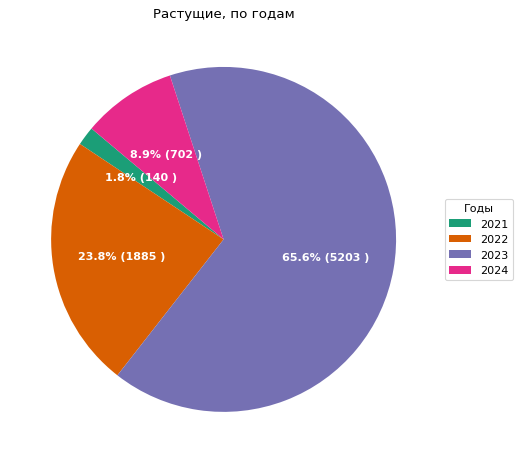

In [ ]:
diag_year(str_cat)

89,4% пользователей - последний взнос делали в 2023-2024 годах

Пользователи 2021 и 2022 года попали в категорию Растущие, т.к. свои первые взносы они делали в этом году.

Свой последний взнос они сделали в 2023 или 2024 году, поэтому по распределению они отнесены к Растущим



Проанализируем как Растущие распределены по месяцам

In [ ]:
table_month(str_cat)

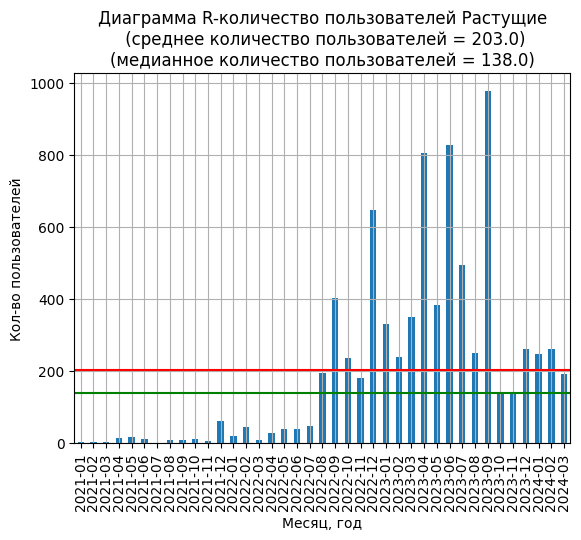

In [ ]:
diag_month (str_cat)

График наглядно демонстрирует, что растущие - начинают чётко проявляться с 08.2022.

Изменим график с этим условием

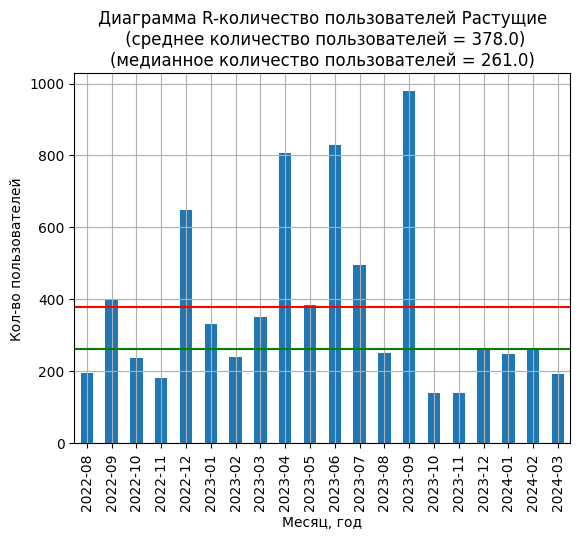

In [ ]:
df=data_cor_rfm[data_cor_rfm['category']==str_cat].groupby('max_ym')['user_id'].count().reset_index()
df=df[df['max_ym']>='08-2022']
  #находим среднее значение для графика
data_cor_rfm_saleS_mean=round(df['user_id'].mean(),0)

  #находим медианное значение для графика
data_cor_rfm_saleS_median=round(df['user_id'].median(),0)

  # график количество пользователей по месяцам
df.plot(x='max_ym',
          y='user_id',
          kind='bar',
          legend=False,
          grid=True)

  #линия  среднего на графике
plt.axhline(y = data_cor_rfm_saleS_mean, color = 'r', linestyle = '-')

  #линия  медианы на графике
plt.axhline(y = data_cor_rfm_saleS_median, color = 'g', linestyle = '-')


plt.title('Диаграмма R-количество пользователей '+str_cat+ '\n (среднее количество пользователей = '+str(data_cor_rfm_saleS_mean)+')\n(медианное количество пользователей = '+str(data_cor_rfm_saleS_median)+')')
plt.xlabel('Месяц, год')
plt.ylabel('Кол-во пользователей')
plt.show()

Среднее и медианное значение имеют значимое различие совпадают (378 и 261 соотвественно), что говорит о существующих аномалиях и выбросах
Видны 5 пиков 09-2022, 12-2022, 04-2023, 06-2023 и 09-2023

Рассмотрим коэффициент F- frequency, количество взносов, которые совершали пользователи из категории Растущие

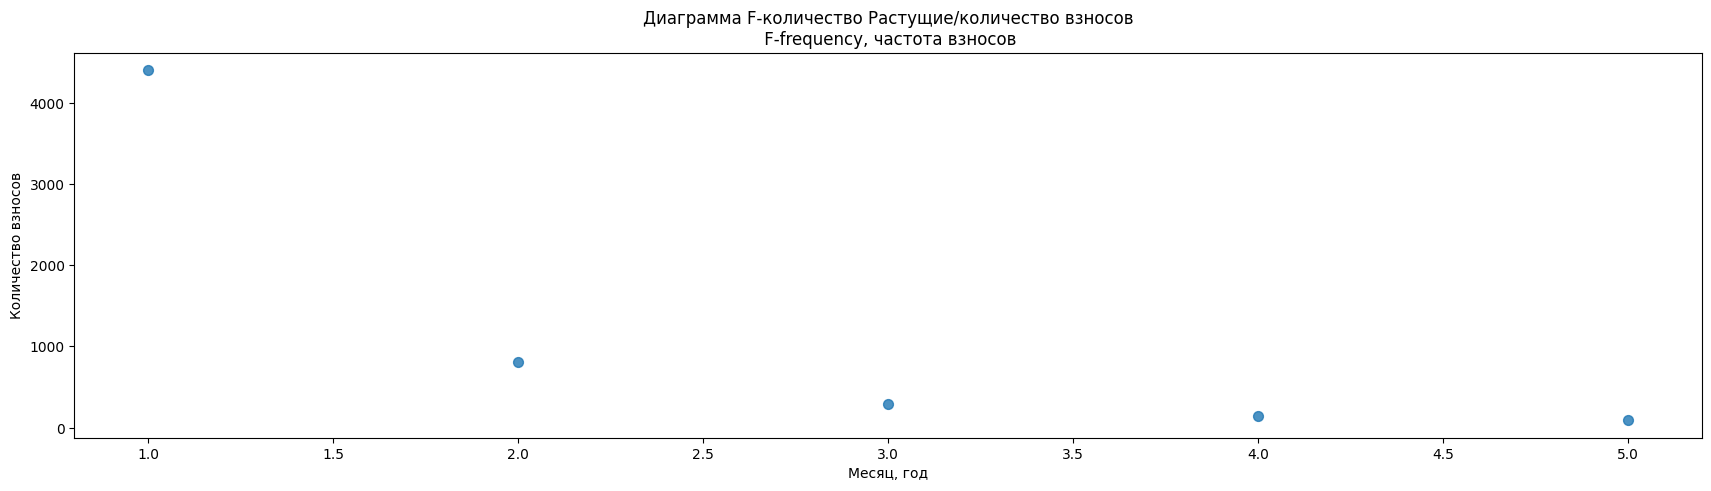

In [ ]:
diag_f (str_cat)

In [ ]:
table_f(str_cat)

Мы видим, что чаще всего пользователи совершали 1 (76,68%) или 2 (14,12%) взноса.

Максимальное количество транзакций равно 5

Давайте посмотрим, как распределены суммы взносов. - M-moneytary

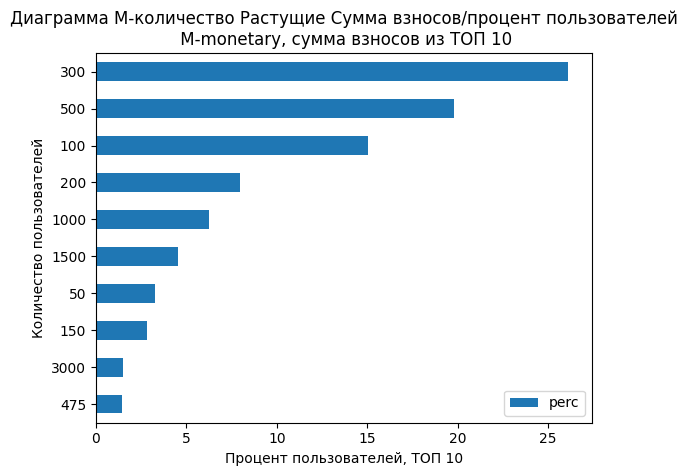

orderlinepriceofline = конечная цена      user_id        perc
count                            171.000000   171.000000  171.000000
mean                             699.099415    46.385965    0.584444
std                             1140.026045   226.924068    2.861194
min                                1.000000     1.000000    0.010000
25%                               77.500000     1.000000    0.010000
50%                              210.000000     2.000000    0.030000
75%                              693.500000     7.000000    0.090000
max                             6000.000000  2071.000000   26.110000

In [ ]:
diag_m (str_cat)

In [ ]:
table_m(str_cat)

Категория *Растущие* основные суммы взносов попадают в ТОП 5
1. 300 руб - 26,11%
2. 500 руб - 19,81%
3. 100 руб - 15,03%
4. 200 руб - 7,99%
5. 1000 руб - 6,24%

Т.о. эти взносы перекрывают более 75% базы пользоватлей.



##### **Вывод по группе "Растущие"**

1. Группа Растущие состоит из пользователей, которые ранее делали взносы, но не на крупные суммы
2. По RFM-таблице к Растущим относят категории 	211, 212, 321
3. В составе 5 737 пользователей (30,76%)
4. По времени, категория распределена следующим образом:
  - 2021 - 141 чел. (1,78%)
  -	2022 - 1 886 чел. (23,78%)
  -	2023 - 5 203 чел.	(65.60%)
  -	2024 - 702 чел. (8.85%)

5. Пользователи данной категории делали от 1 до 5 взносов
  - 1 взнос - 4 399 ч. - 	76.68%
  - 2 взноса - 810 ч. - 14,12%
  - 3 взноса - 291 ч. - 5,07%
  - 4	взноса - 145 ч. - 2.53%
  - 5 взносов - 92 ч. -	1.60%


6. Сумма взносов изменяется от 1 до 6,0 тыс.руб
  1. 300 руб - 26,11%
  2. 500 руб - 19,81%
  3. 100 руб - 15,03%
  4. 200 руб - 7,99%
  5. 1000 руб - 6,24%


#### Новички

В последнее время совершали взносы, необязательно крупные.

Низкий уровень частоты и суммы взносов, т.к. они недавностали заниматься благотоврительностью

In [ ]:
str_cat='Новички'

In [ ]:
table_year (str_cat)

Количество уникальных пользователей в категории Новички  -  3972


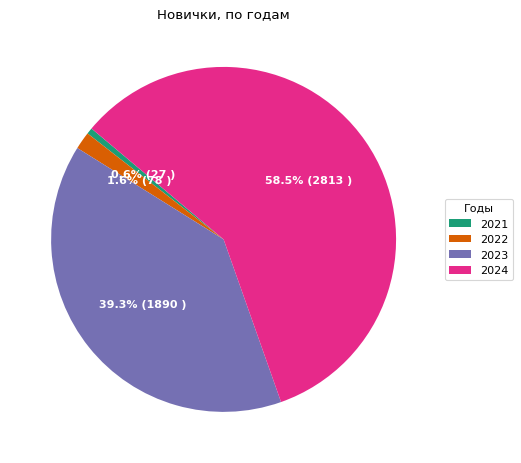

In [ ]:
diag_year(str_cat)

97,8% пользователей - последний взнос делали в 2023, 2024 году

В 2021 и 2022 годах только 107 пользователей попали в категорию Новички. Это небольшое количество людей (2,3%), и их можно рассматривать как статистическую погрешность.

Для точного анализа, рассмотрим как выглядят Новички в разрезе месяцев

In [ ]:
table_month(str_cat)

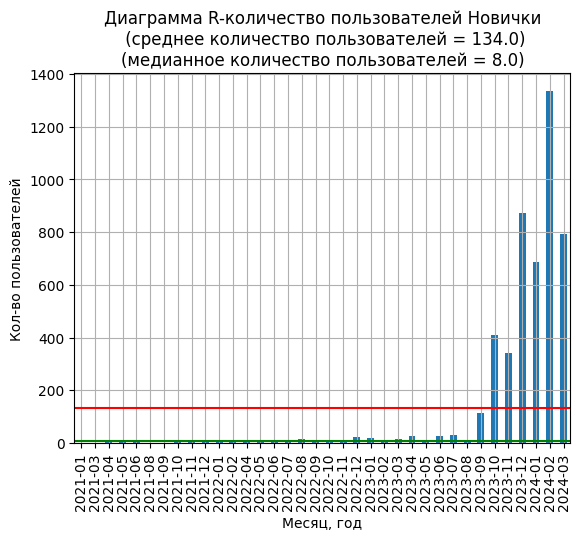

In [ ]:
diag_month (str_cat)

График наглядно демонстрирует, что Новички - это пользователи с сентября 2023

При этом среднее и медианные значения из-за аномалий до 09-2023 явно занижены.

Пересчитаем среднее и медианное значение, избавившись от аномальных месяцев

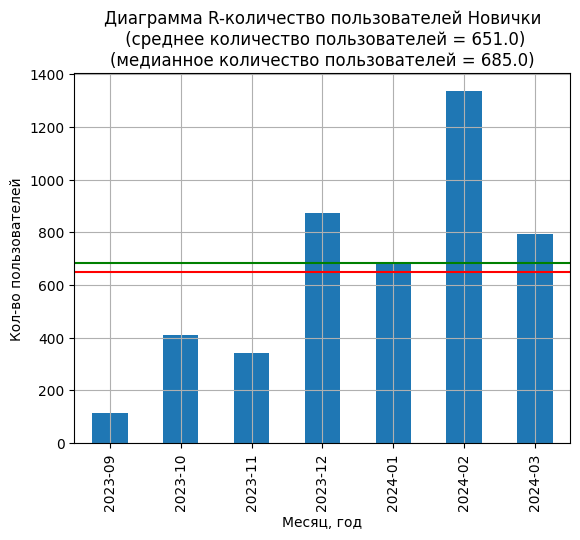

In [ ]:
df=data_cor_rfm[data_cor_rfm['category']==str_cat].groupby('max_ym')['user_id'].count().reset_index()
df=df[df['max_ym']>'08-2023']
  #находим среднее значение для графика
data_cor_rfm_saleS_mean=round(df['user_id'].mean(),0)

  #находим медианное значение для графика
data_cor_rfm_saleS_median=round(df['user_id'].median(),0)

  # график количество пользователей по месяцам
df.plot(x='max_ym',
          y='user_id',
          kind='bar',
          legend=False,
          grid=True)

  #линия  среднего на графике
plt.axhline(y = data_cor_rfm_saleS_mean, color = 'r', linestyle = '-')

  #линия  медианы на графике
plt.axhline(y = data_cor_rfm_saleS_median, color = 'g', linestyle = '-')


plt.title('Диаграмма R-количество пользователей '+str_cat+ '\n (среднее количество пользователей = '+str(data_cor_rfm_saleS_mean)+')\n(медианное количество пользователей = '+str(data_cor_rfm_saleS_median)+')')
plt.xlabel('Месяц, год')
plt.ylabel('Кол-во пользователей')
plt.show()

Теперь можно сказать, что ежемесячная активность Новичков в среднем совпадает с медианным значением - 651/685 человек.

Так же можно отметить, рост этой категории, с аномальными всплесками на 12-2023 (новый год) и 02-2024

Рассмотрим коэффициент F- frequency, количество взносов, которые совершали пользователи из категории Новички

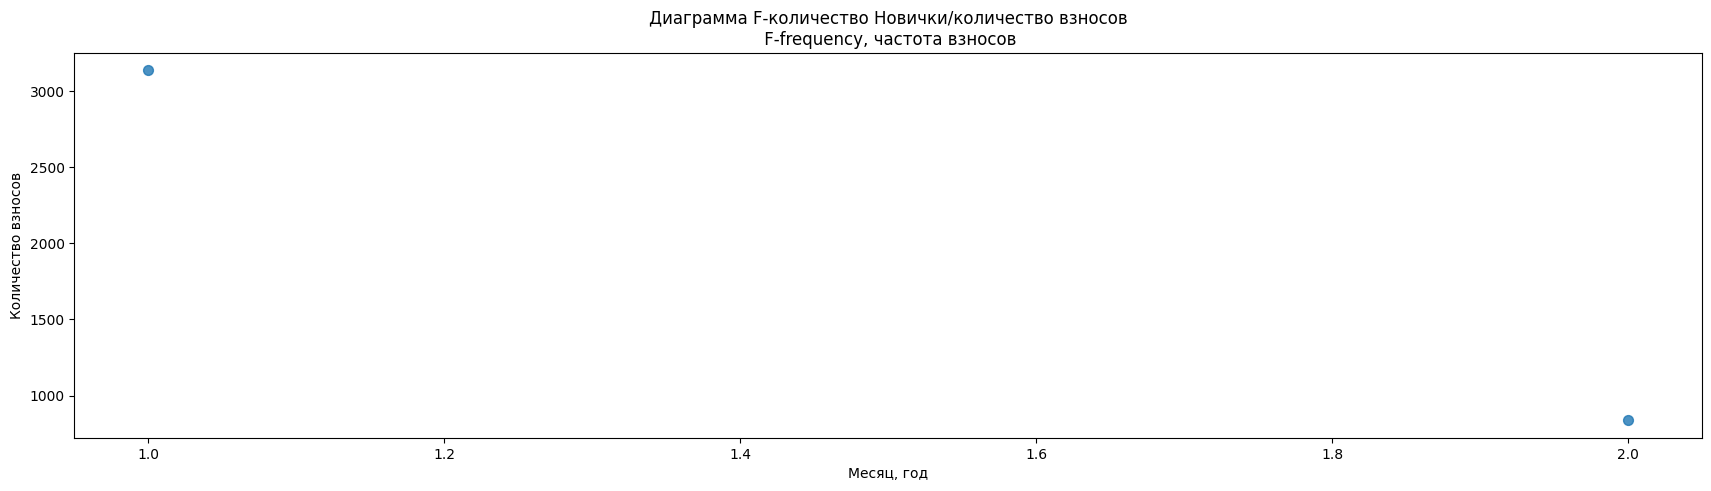

In [ ]:
diag_f (str_cat)

In [ ]:
table_f(str_cat)

Мы видим, что все пользователи либо совершили один взнос (78,9%), либо два (21,1%).

Небольшое количество взносов объясняется тем, что многие пользователи только недавно начали заниматься благотворительностью. Поэтому они осуществили небольшое количество транзакций.

Давайте посмотрим, как распределены суммы взносов. - M-moneytary

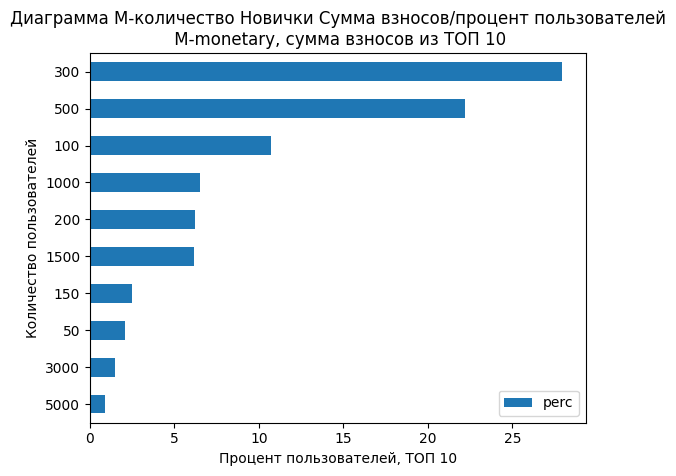

orderlinepriceofline = конечная цена      user_id        perc
count                            179.000000   179.000000  179.000000
mean                            2591.318436    26.871508    0.557877
std                             9486.280032   138.162135    2.872366
min                                1.000000     1.000000    0.020000
25%                              109.000000     1.000000    0.020000
50%                              310.000000     1.000000    0.020000
75%                             1065.000000     4.000000    0.080000
max                           100000.000000  1345.000000   27.960000

In [ ]:
diag_m (str_cat)

In [ ]:
table_m(str_cat)

!!! Категория *Новички* основные суммы взносов попадают в ТОП 5
1. 300 руб - 27,96%
2. 500 руб - 22,18%
3. 100 руб - 10,71%
4. 1000 руб - 6,49%
5. 200 руб - 6,24%
6. 1500 руб - 6,15%

Т.о. эти взносы перекрывают почти 80% базы пользоватлей.



##### **Вывод по группе "Новички"**

1. Группа Новички состоит из пользователей, которые последнее время совершали взносы, необязательно крупные. Низкий уровень частоты и суммы взносов, т.к. они недавностали заниматься благотоврительностью
2. По RFM-таблице к Новичкам относят категории 	311, 312, 313
3. В составе 3 972 пользователей (21,3%)
4. По времени, категория распределена следующим образом:
-	2021	28	(0,58%)
-	2022	79	(1,64%)
-	2023	1 890 (39,29%)
-	2024	2 813	(58,48%)


Данные за 2021, 2022 год - в рамках стат погрешности (менее 2,4%) связано с особенностью распределени данных

5. Пользователи данной категории делали от 1 до 2 взносов
  - 1 взнос - 3 134 чел. (78,90%)
  - 2 взноса - 838 чел. (21,10%)

6. Сумма взносов изменяется от 1 до 100,0 тыс.руб
  1. 300 руб - 27,96%
  2. 500 руб - 22,18%
  3. 100 руб - 10,71%
  4. 1000 руб - 6,49%
  5. 200 руб - 6,24%
  6. 1500 руб - 6,15%

#### Чемпионы

Недавно делали взносы, делают взносы часто и больше всех

In [ ]:
str_cat='Чемпионы'

In [ ]:
table_year (str_cat)

Количество уникальных пользователей в категории Чемпионы  -  1098


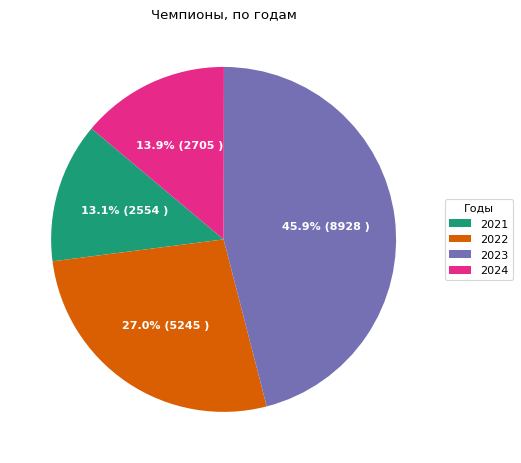

In [ ]:
diag_year(str_cat)

Чемпионы присутствуют в каждом анализируемом годе - и в 2021, и в 2022, и в 2023, и в 2024. Это говорит о том, что Чемпионы переходят из года в год, являются пользователями сервиса на постоянной основе.

Интересная закономерность, количество уникальных Чемпионов ежегодно увеличивается в 1,7 - 2,0 раза.

По отношению 2022 к 2021 - с 13,1% до 27,0%
По отношению 2023 к 2022 - с 27% до 45,9%



Проанализируем как Чемпионы распределены по месяцам

In [ ]:
table_month(str_cat)

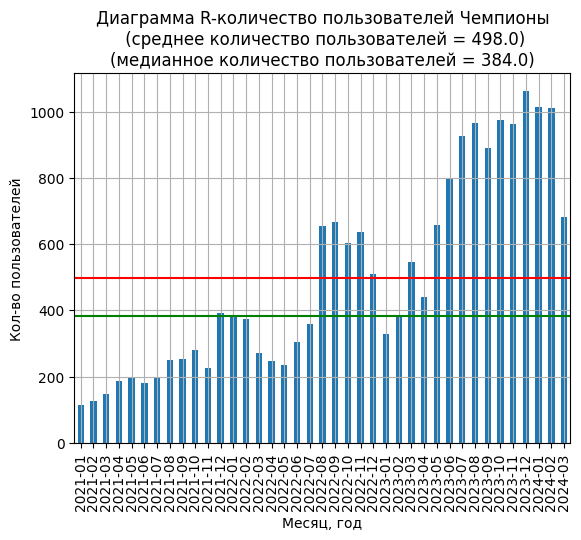

In [ ]:
diag_month (str_cat)

График наглядно демонстрирует, что количество уникальных Чемпионов - имеет тенденцию к росту



Рассмотрим коэффициент F- frequency, количество взносов, которые совершали пользователи из категории Растущие

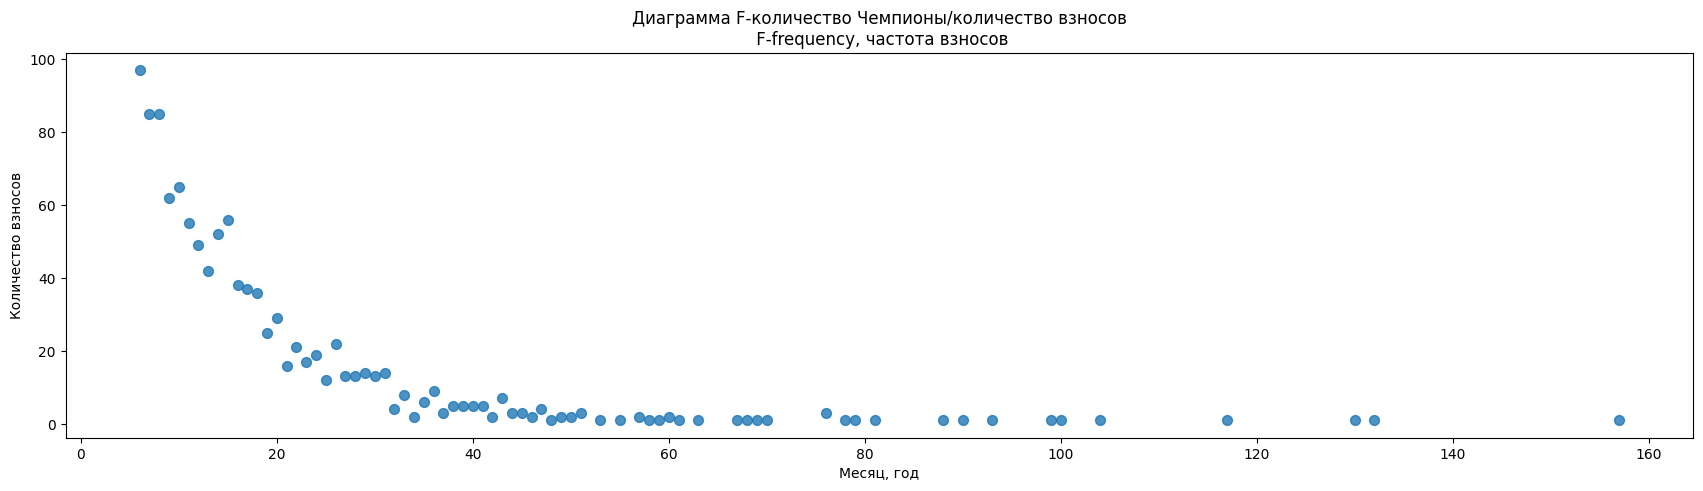

In [ ]:
diag_f (str_cat)

In [ ]:
table_f(str_cat)

Мы видим, что чаще распределение по количеству взносов у Чемпионов достаточно плотное и распределяется от 6 взносов (8,2%) до 157 взносов (0,09%)

При этом 80% взносов - это равномерно распределенные взносы от 6 до 25 штук/за период

Давайте посмотрим, как распределены суммы взносов. - M-moneytary

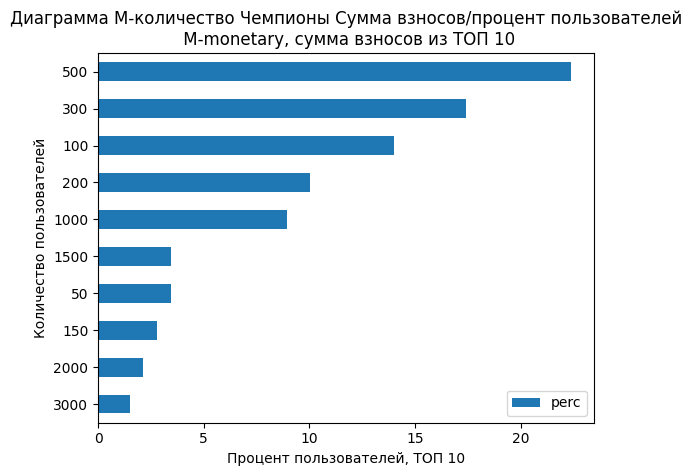

orderlinepriceofline = конечная цена      user_id        perc
count                            350.000000   350.000000  350.000000
mean                            3060.714286    55.522857    0.288371
std                             7654.802212   359.488738    1.849177
min                                1.000000     1.000000    0.010000
25%                              109.250000     1.000000    0.010000
50%                              351.000000     2.000000    0.010000
75%                             2659.250000     6.500000    0.037500
max                            90000.000000  4346.000000   22.360000

In [ ]:
diag_m (str_cat)

In [ ]:
table_m(str_cat)

!!! Категория *Чемпионы* основные суммы взносов попадают в ТОП 5
1. 500 руб - 22,36%
2. 300 руб - 17,43%
3. 100 руб - 13,99%
4. 200 руб - 10,04%
5. 1000 руб - 8,93%

Т.о. эти взносы перекрывают почти 73% базы пользоватлей.



##### **Вывод по группе "Чемпионы"**

1. Группа Чемпионы состоит из пользователей, которые делают взносы часто и больше всех
2. По RFM-таблице к Чемпионам относят категории 333, 332
3. В составе 1 98 пользователя (5,89%)
4. По времени, категория распределена следующим образом:
-	2021 - 2 554	(13,14%)
-	2022 - 5 245	(26,99%)
-	2023 - 8 929	(45,95%)
-	2024 - 2 705	(13,92%)


Чемпионы присутствуют в каждом анализируемом годе - и в 2021, и в 2022, и в 2023, и в 2024. Это говорит о том, что Чемпионы переходят из года в год, являются пользователями сервиса на постоянной основе.

5. Интересная закономерность, количество уникальных Чемпионов ежегодно увеличивается в 1,7 - 2,0 раза.

6. Чемпионы делают большое количество взносов от 6 до 157.

В ТОП20 - находятся равномерно распределенные взносы от 6 до 25 штук за период - 80% взносов от всей базы


6. Сумма взносов изменяется от 1 до 90000,0 тыс.руб
  1. 500 руб - 22,36%
  2. 300 руб - 17,43%
  3. 100 руб - 13,99%
  4. 200 руб - 10,04%
  5. 1000 руб - 8,93%


#### Лояльные

Делают частые взносы на крупные суммы

In [ ]:
str_cat='Лояльные'

In [ ]:
table_year (str_cat)

Количество уникальных пользователей в категории Лояльные  -  633


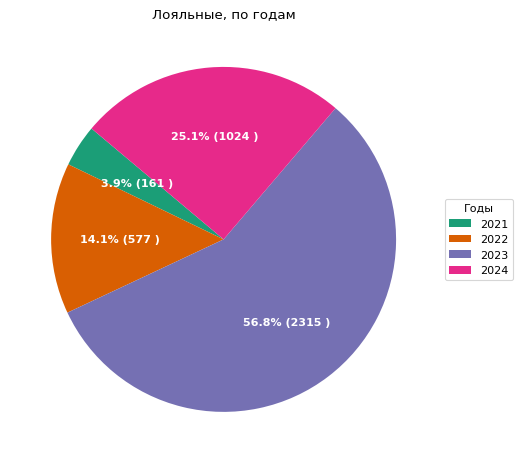

In [ ]:
diag_year(str_cat)

Лояльные пользователи присутствуют в каждом анализируемом годе - и в 2021, и в 2022, и в 2023, и в 2024.



Проанализируем как Лояльные распределены по месяцам

In [ ]:
table_month(str_cat)

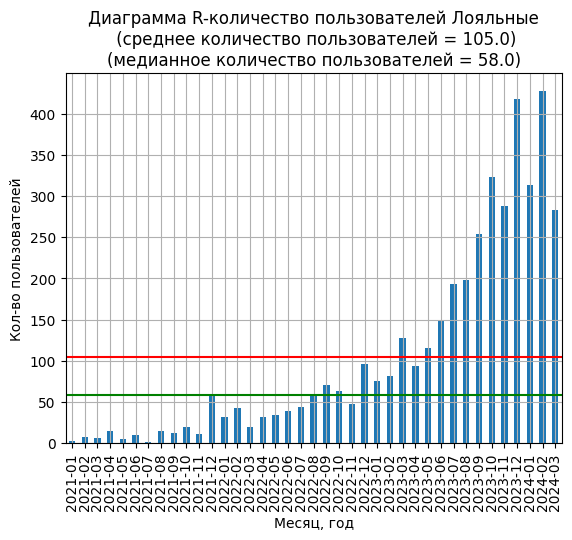

In [ ]:
diag_month (str_cat)

График наглядно демонстрирует, что количество уникальных Лояльных пользователей - имеет тенденцию к росту



Рассмотрим коэффициент F- frequency, количество взносов, которые совершали пользователи из категории Лояльные

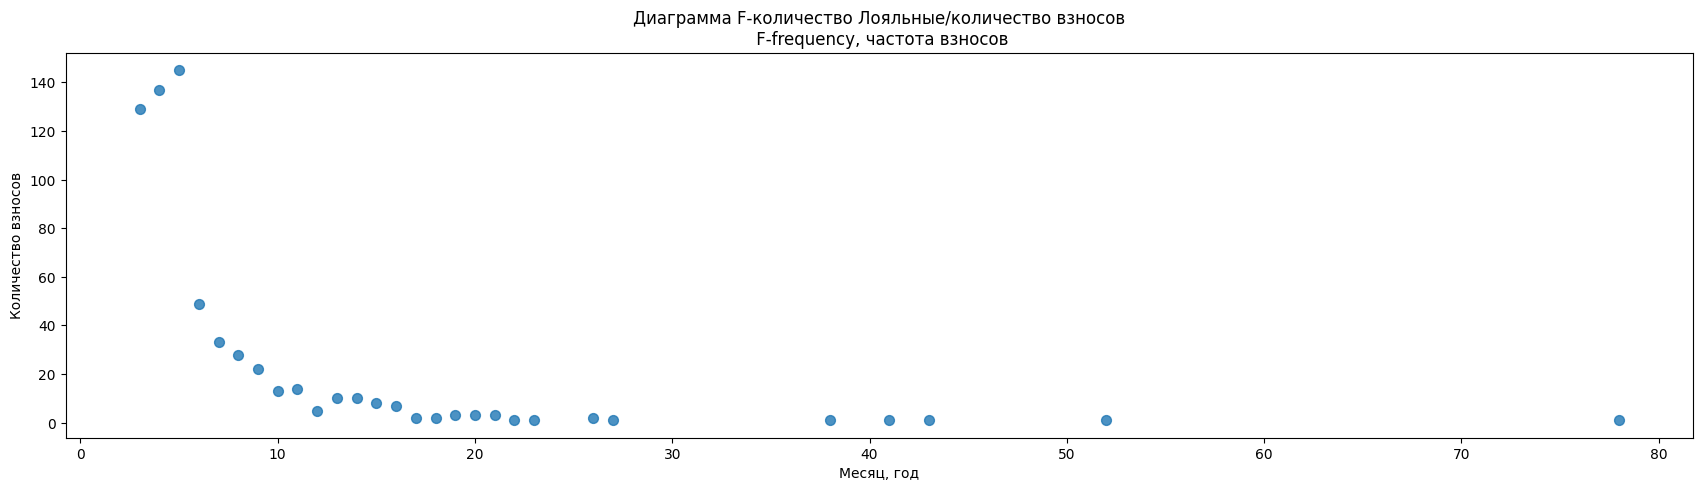

In [ ]:
diag_f (str_cat)

In [ ]:
table_f(str_cat)

Мы видим, что чаще распределение по количеству взносов у Лояльных пользователей достаточно плотное и распределяется от 3 взносов 78 взносов

При этом 80% взносов - это равномерно распределенные взносы от 3 до 9 штук/за период

Давайте посмотрим, как распределены суммы взносов. - M-moneytary

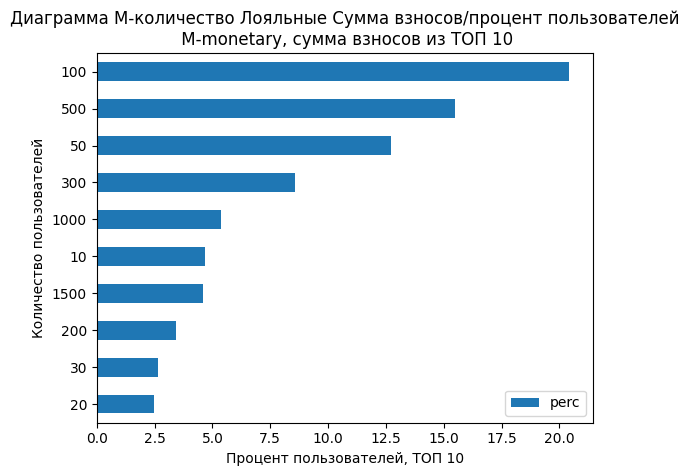

orderlinepriceofline = конечная цена     user_id        perc
count                            155.000000  155.000000  155.000000
mean                            5437.129032   26.316129    0.642968
std                            17238.636609  100.511856    2.464439
min                                1.000000    1.000000    0.020000
25%                               54.500000    1.000000    0.020000
50%                              206.000000    2.000000    0.050000
75%                             1279.000000    7.000000    0.170000
max                           115000.000000  833.000000   20.420000

In [ ]:
diag_m (str_cat)

In [ ]:
table_m(str_cat)

!!! Категория *Лояльные* основные суммы взносов попадают в ТОП 5
1. 100 руб - 20,42%
2. 500 руб - 15,49%
3. 50 руб - 12,70%
4. 300 руб - 8,56%
5. 1000 руб - 5,39%

Т.о. эти взносы перекрывают почти 65% базы пользоватлей.



##### **Вывод по группе "Лояльные"**

1. Группа "Лояльные" состоит из пользователей, которые делают частые взносы на крупные суммы
2. По RFM-таблице к Лояльным относят категории 331, 322, 323
3. В составе 633 пользователя (3,39%)
4. По времени, категория распределена следующим образом:
-	2021 - 161	(3,95%)
-	2022 - 577 (14,15%)
-	2023 - 2 316 (56,78%)
-	2024 - 1 025 (25,13%)

5. Лояльные пользователи делают большое количество взносов от 3 до 78.

В ТОП20 - находятся равномерно распределенные взносы от 3 до 9 штук за период - 80% взносов от всей базы


6. Сумма взносов изменяется от 1 до 90000,0 тыс.руб
  1. 100 руб - 20,42%
  2. 500 руб - 15,49%
  3. 50 руб - 12,70%
  4. 300 руб - 8,56%
  5. 1000 руб - 5,39%


#### На грани

Показатели давности, частоты и суммы взносов ниже средней

In [ ]:
str_cat='На грани'

In [ ]:
table_year (str_cat)

Количество уникальных пользователей в категории На грани  -  509


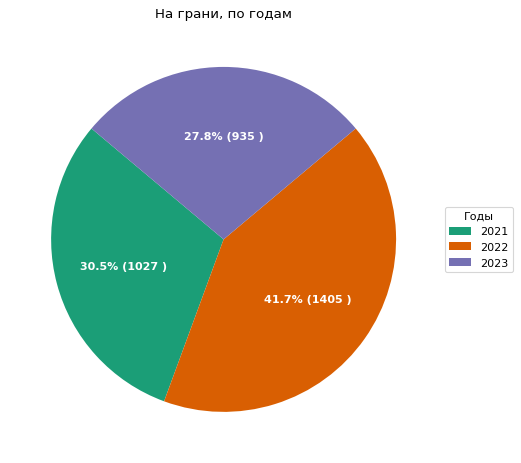

In [ ]:
diag_year(str_cat)

Пользователи категории "На грани" распределены примерно поровну между 2021, 2022 и 2023 годами



Проанализируем как Лояльные распределены по месяцам

In [ ]:
table_month(str_cat)

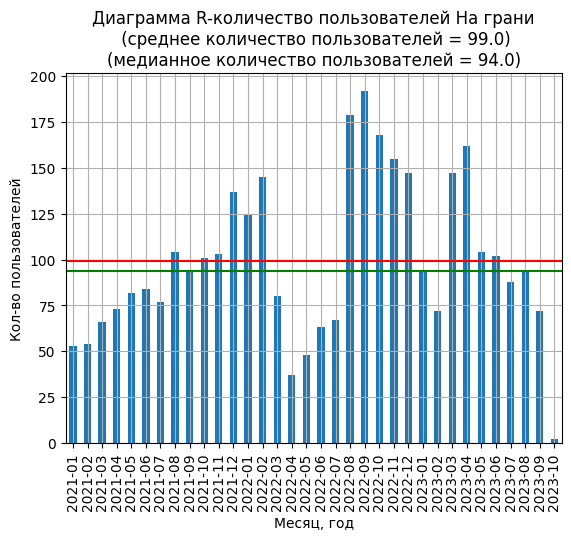

In [ ]:
diag_month (str_cat)

Здесь также видим два пика, а так же обратим внимание, что среднее и медианное количество пользователей примерно одинаковое (99 и 94 чел. соотвественно)



Рассмотрим коэффициент F- frequency, количество взносов, которые совершали пользователи из категории На грани

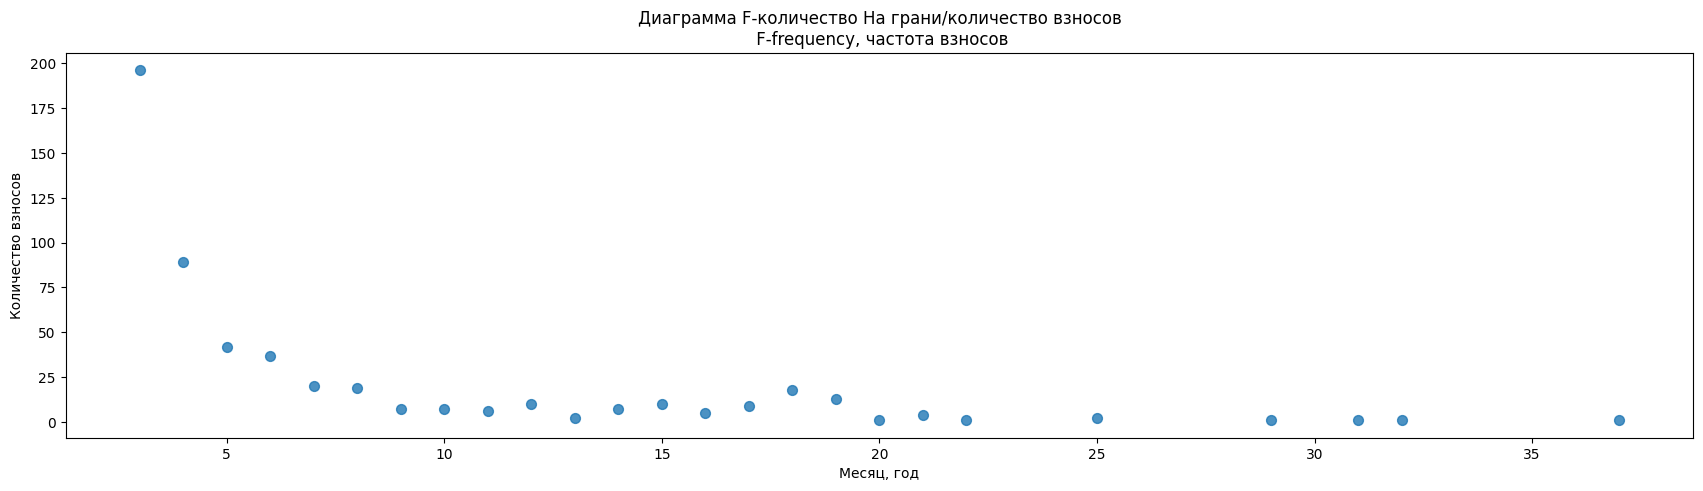

In [ ]:
diag_f (str_cat)

In [ ]:
table_f(str_cat)

Мы видим, что чаще распределение по количеству взносов у пользователей На грани распределяется от 3 до 37 взносов

При этом 80% взносов - это равномерно распределенные взносы от 3 до 8 штук/за период

Давайте посмотрим, как распределены суммы взносов. - M-moneytary

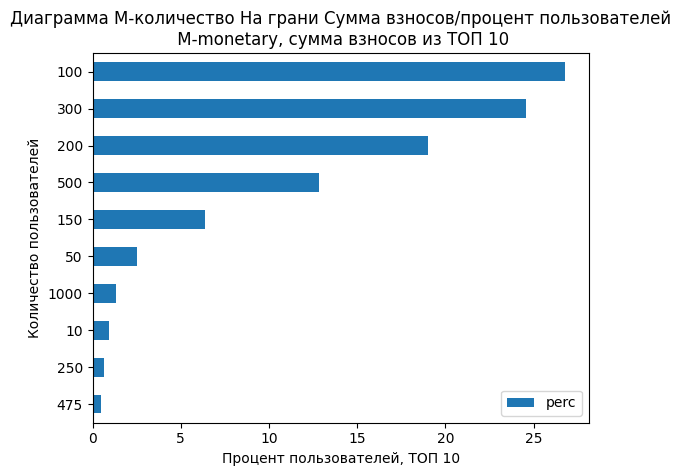

orderlinepriceofline = конечная цена     user_id       perc
count                             70.000000   70.000000  70.000000
mean                             330.542857   48.142857   1.429143
std                              442.555218  169.836092   5.039809
min                                3.000000    1.000000   0.030000
25%                               76.250000    1.000000   0.030000
50%                              152.500000    2.000000   0.060000
75%                              389.500000    5.000000   0.150000
max                             2500.000000  902.000000  26.770000

In [ ]:
diag_m (str_cat)

In [ ]:
table_m(str_cat)

!!! Категория *На грани* основные суммы взносов попадают в ТОП 5
1. 100 руб - 26,77%
2. 300 руб - 24,54%
3. 200 руб - 19,02%
4. 500 руб - 12,82%
5. 150 руб - 6,35%

Т.о. эти взносы перекрывают почти 90% базы пользоватлей.



##### **Вывод по группе "На грани"**

1. Группа "На грани" состоит из пользователей, у которых показатели давности, частоты и суммы взносов ниже средней
2. По RFM-таблице к Лояльным относят категории 221, 232
3. В составе 509 пользователя (2,73%)
4. По времени, категория распределена следующим образом:
-	2021 - 1 028	(30,50%)
-	2022 - 1 406 (41,72%)
-	2023 - 936 (27,77%)


5. Пользователи На граниделают большое количество взносов от 3 до 37.

В ТОП20 - находятся равномерно распределенные взносы от 3 до 8 штук за период - 80% взносов от всей базы


6. Сумма взносов изменяется от 3 до 2,5 тыс.руб
 1. 100 руб - 26,77%
 2. 300 руб - 24,54%
 3. 200 руб - 19,02%
 4. 500 руб - 12,82%
 5. 150 руб - 6,35%


#### В зоне риска

Ранее часто делали взносы на большие суммы, но давно не делали взносы

In [ ]:
str_cat='В зоне риска'

In [ ]:
table_year (str_cat)

Количество уникальных пользователей в категории В зоне риска  -  429


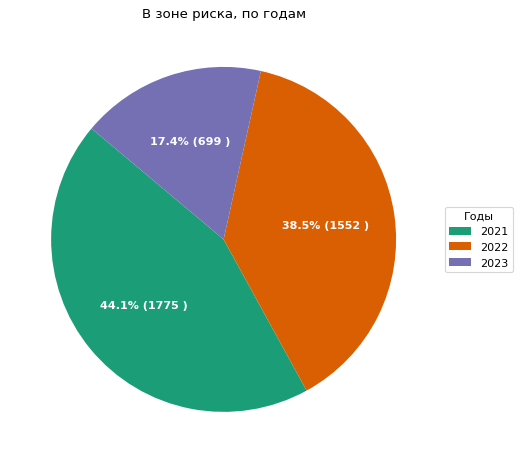

In [ ]:
diag_year(str_cat)

Пользователи категории "В зоне риска" в большинстве совершали транзакции в 2021 году (44,1%)



Проанализируем как пользователи В зоне риска распределены по месяцам

In [ ]:
table_month(str_cat)

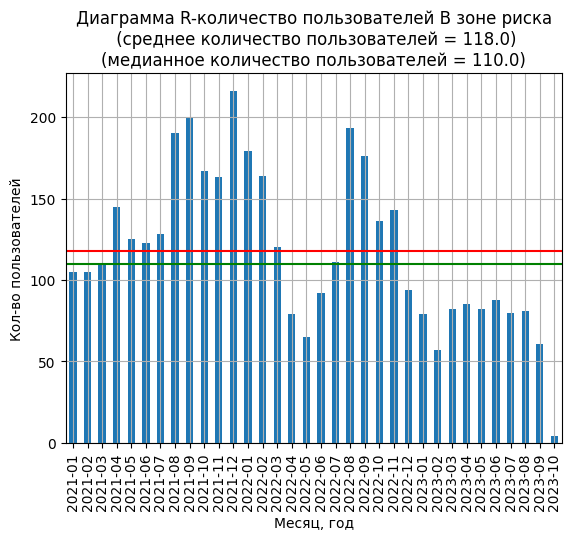

In [ ]:
diag_month (str_cat)

Здесь также видим два пика, а так же обратим внимание, что среднее и медианное количество пользователей примерно одинаковое (118 и 110 чел. соотвественно)

Основное количество действий пользователей приходится на период 01-2021 - 03-2022



Рассмотрим коэффициент F- frequency, количество взносов, которые совершали пользователи из категории "В зоне риска"

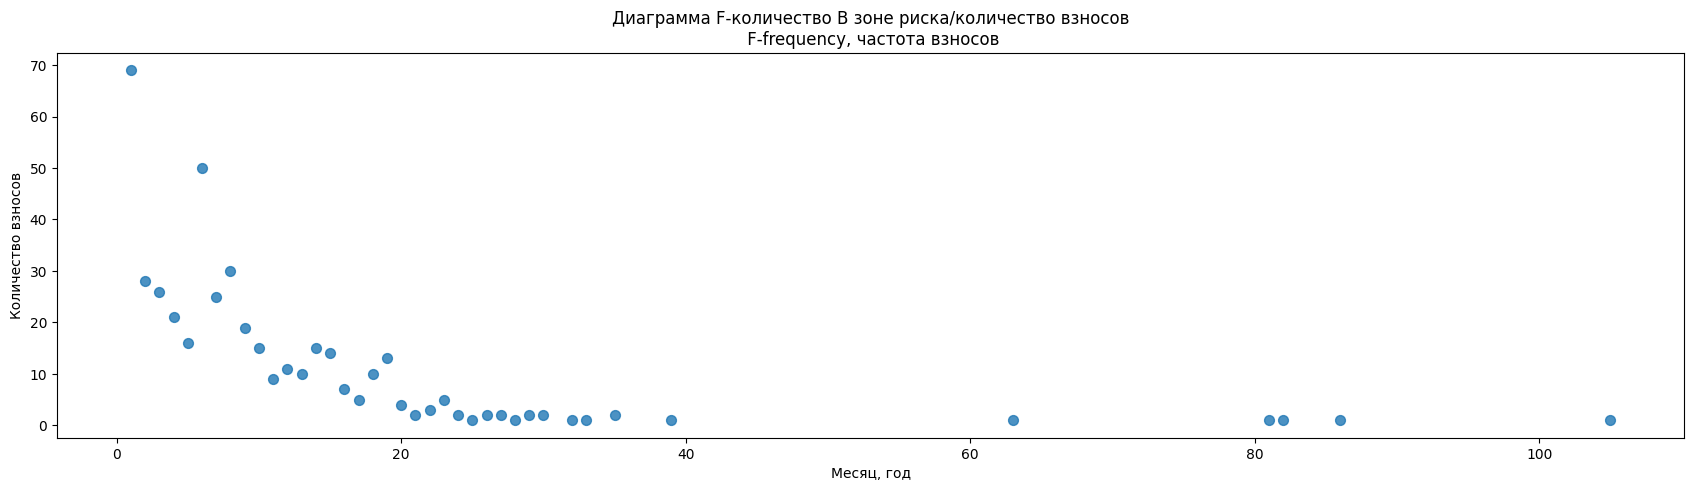

In [ ]:
diag_f (str_cat)

In [ ]:
table_f(str_cat)

Мы видим, что количество взносов у пользователей В зоне риска распределяется от 1 до 105 взносов

Так же можно отметиьт нелинейное изменение взносов в интервале от 1 до 20

Давайте посмотрим, как распределены суммы взносов. - M-moneytary

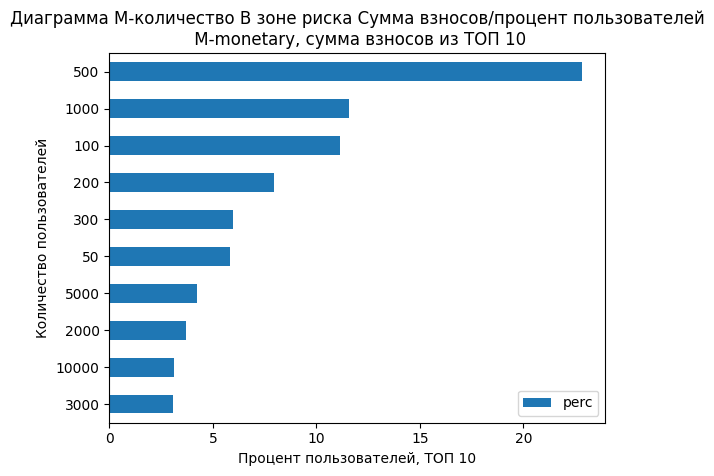

orderlinepriceofline = конечная цена     user_id        perc
count                             178.00000  178.000000  178.000000
mean                             7855.38764   22.623596    0.559157
std                             22977.33606   91.821978    2.280826
min                                 1.00000    1.000000    0.020000
25%                               242.50000    1.000000    0.020000
50%                              1254.00000    1.000000    0.020000
75%                              5093.00000    5.000000    0.120000
max                            200000.00000  919.000000   22.820000

In [ ]:
diag_m (str_cat)

In [ ]:
table_m(str_cat)

Категория *В зоне риска* основные суммы взносов попадают в ТОП 5
1. 500 руб - 22,82%
2. 1000 руб - 11,60%
3. 100 руб - 11,12%
4. 200 руб - 7,95%
5. 300 руб - 5,96%

Т.о. эти взносы перекрывают почти 60% базы пользоватлей.



##### **Вывод по группе "В зоне риска"**

1. Группа "В зоне риска" состоит из пользователей, которые ранее часто делали взносы на большие суммы, но давно не делали взносы
2. По RFM-таблице к Лояльным относят категории 113, 123, 132, 133, 223, 231, 233
3. В составе 429 пользователей (2,30%)
4. По времени, категория распределена следующим образом:
-	2021 - 1 776	(44,10%)
-	2022 - 1 552 (38,54%)
-	2023 - 699 (17,36%)


5. Пользователи В зоне риска делают большое количество взносов от 1 до 105.


6. Сумма взносов изменяется от 3 до 2,5 тыс.руб
  1. 500 руб - 22,82%
  2. 1000 руб - 11,60%
  3. 100 руб - 11,12%
  4. 200 руб - 7,95%
  5. 300 руб - 5,96%


#### Требуют внимание

Уровень давности взносов выше среднего, частота и сумма взносов на на среднем уровне.
Могут не совершать взносы в последнее время

По  RFM-таблице - 213, 222

In [ ]:
str_cat='Требуют внимание'

In [ ]:
table_year (str_cat)

Количество уникальных пользователей в категории Требуют внимание  -  294


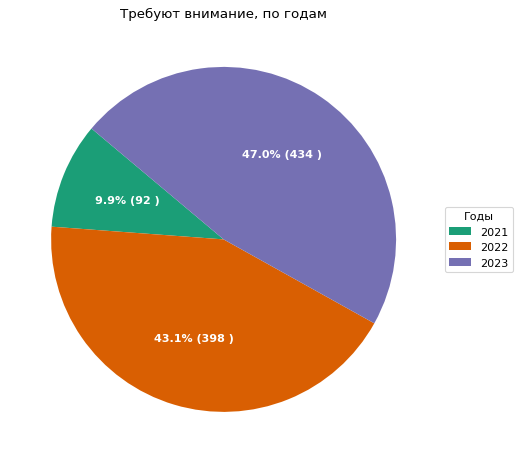

In [ ]:
diag_year(str_cat)

90,1% пользователей - последний взнос делали в 2022, 2023 годах

В 2021 в таблицу попали 9,9 % пользователей (92 человека)

Для точного анализа, рассмотрим как выглядят пользователи категории "Требуют внимание" в разрезе месяцев

In [ ]:
table_month(str_cat)

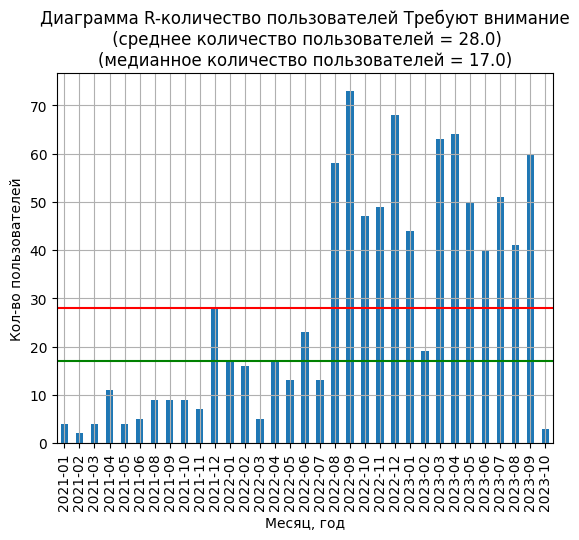

In [ ]:
diag_month (str_cat)

График наглядно демонстрирует, что категория "Требуют внимание" - это пользователи которые активно работали с фондом на протяжении всего анализируемого периода.

Визуально можно разбить всё время сотрудничества на три периода
1. 01-2021 - 11-2021
2. 12-2021 - 07-2022
3. 08-2022 - 09-2023

Пользователи , попавшие в первый период - ранние пользователи, которые перешли в категорию "Спящие" и после сделали дополнительные взносы в более поздние периоды.

Рассмотрим коэффициент F- frequency, количество взносов, которые совершали пользователи из категории Растущие

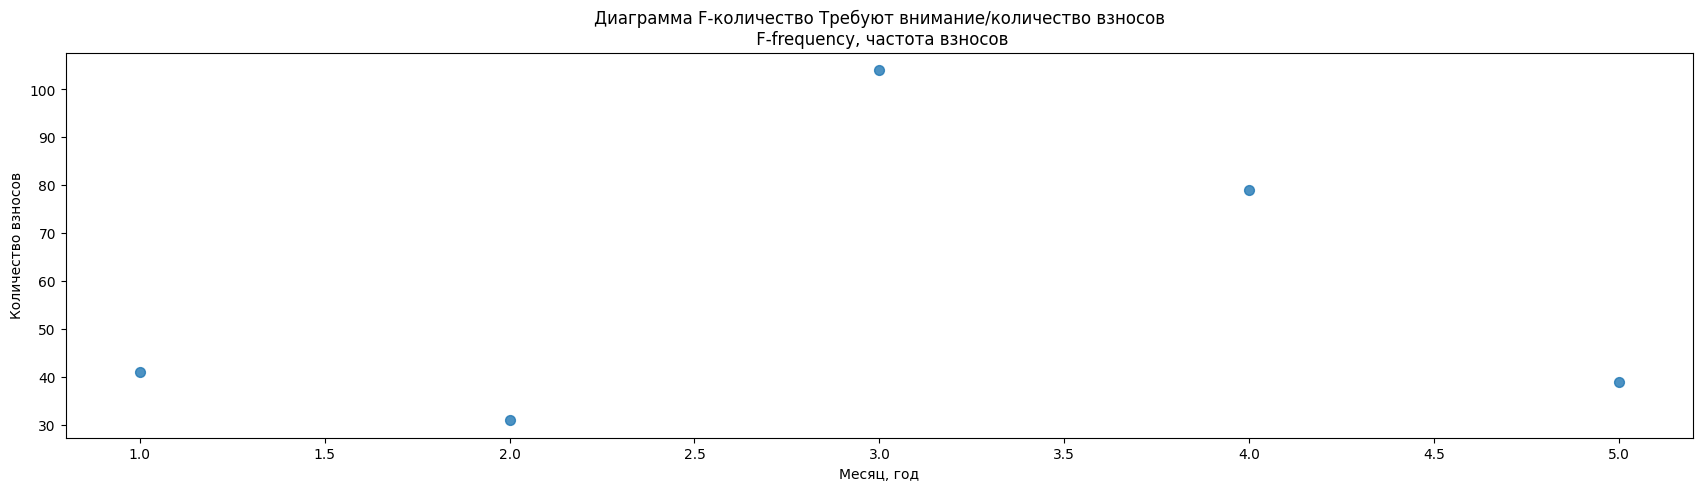

In [ ]:
diag_f (str_cat)

In [ ]:
table_f(str_cat)

В отличии от предудущих категорий, распределение количества взносов у "Требующих внимание" не столь однозначно.

Опять же видны две группы
1-2 взноса и 3-5 взносов

Чаще всего пользователи этой категории делали 3 или 4 взноса

Давайте посмотрим, как распределены суммы взносов. - M-moneytary

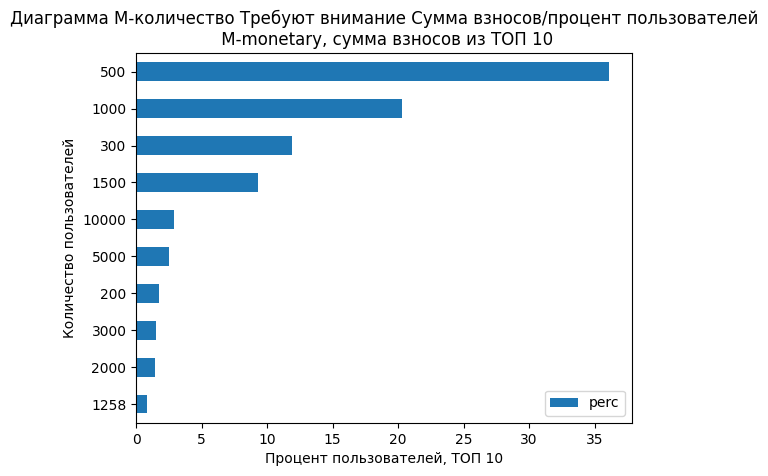

orderlinepriceofline = конечная цена     user_id       perc
count                             59.000000   59.000000  59.000000
mean                            7265.966102   15.694915   1.696102
std                            11819.079050   51.562234   5.567999
min                               93.000000    1.000000   0.110000
25%                              535.000000    1.000000   0.110000
50%                             1500.000000    1.000000   0.110000
75%                             8650.000000    5.500000   0.595000
max                            60700.000000  334.000000  36.070000

In [ ]:
diag_m (str_cat)

In [ ]:
table_m(str_cat)

Категория *"Требующие внимание"* основные суммы взносов попадают в ТОП 5
1. 500 руб - 36,07%
2. 1 000 руб - 20,30%
3. 300 руб - 11,88%
4. 1 500 руб - 9,29%
5. 10 000 руб - 2,92%

Т.о. эти взносы перекрывают более 80% базы пользователей.



##### **Вывод по группе "Требующие внимание"**

1. Группа "Требующие внимание" состоит из пользователей, Уровень давности взносов выше среднего, частота и сумма взносов на на среднем уровне.
Могут не совершать взносы в последнее время
2. По RFM-таблице к Требуют внимание относят категории 	213, 222
3. В составе 294 пользователя (1,58%)
4. По времени, категория распределена следующим образом:
-	2021	- 92 чел.	(9,94%)
-	2022	- 399 чел. (43,09%)
-	2023	- 435 чел. (46,98%)


5. Пользователи данной категории делали от 1 до 5 взносов
- 1 взнос - 41 чел. (13,95%)
- 2 взноса - 31 чел. (10,54%)
- 3 взноса - 104 чел. (35,37%)
- 4 взноса - 79 чел. (26,87%)
- 5 взносов - 39 чел. (13,27%)


6. Сумма взносов изменяется от 93 до 60,7 тыс.руб
  1. 500 руб - 36,07%
  2. 1 000 руб - 20,30%
  3. 300 руб - 11,88%
  4. 1 500 руб - 9,29%
  5. 10 000 руб - 2,92%

### Исторический импорт

Проанализируем, как распределены пользователи из датафрейма "Исторический импорт" - те пользователи, которые давно сотрудничают с фондом

In [ ]:
df_im=pd.read_csv('/content/drive/MyDrive/AiF/import.csv', sep=';', encoding='windows-1251')
df_im.head(5).style

Для проведения анализа необходимы только ID этих клиентов, чтобы по ним сопоставить, в какие группы RFM-анализа они попадают

In [ ]:
history_id=[]
history_id=df_im['CustomerActionIdsMindboxId'].unique()
len(history_id)

7651

Всего в Историческом импорте содержится 7651 уникальный пользователь.

Рассмотрим, сколько из них остались активными после переноса

Добавим в RFM_table колонку history_id.

Если user_id относится к историческому импорту, значение history_id=1

In [ ]:
RFM_table['history_id']=0

for user_id in range(len(RFM_table)):
  for h_id in history_id:
    if h_id==RFM_table.loc[user_id, 'user_id']:
      RFM_table.loc[user_id,'history_id']=1
      break
    else: 0



In [ ]:
RFM_table['history_id'].value_counts()

history_id
0    15896
1     2756
Name: count, dtype: int64

Т.о. из исторического импорта в новую базу перешли 2756 пользователей, что составляет

In [ ]:
print('Из исторического импорта перешли в новую базу',
      round(RFM_table['history_id'].sum()/len(history_id)*100, 2),
      '%')

Из исторического импорта перешли в новую базу 36.02 %


In [ ]:
df_history=pd.DataFrame(RFM_table[RFM_table['history_id']==1]).groupby('category').agg({'category':'count',
                                                                                       'monetary':'sum'})
df_history.columns=(['count', 'sum'])

# рассчитаем отношение количество людей в категории к общему количеству
df_history['perc']=round(df_history['count']/df_history['count'].sum()*100,2)
df_history.sort_values(by='count', ascending=False)


count      sum   perc
category                               
Спящие             1951  1296579  70.79
Чемпионы            259  3552164   9.40
Растущие            138   125287   5.01
В зоне риска        124  2368212   4.50
На грани            117   233169   4.25
Лояльные             75   382204   2.72
Требуют внимание     54   159116   1.96
Новички              38    58950   1.38

Видим, что
- 70,79% из Исторического импорта попали в Спящие
- 9,4% - это Чемпионы (!)
- от 4 до 5% занимают "Растущие", "В зоне риска" и "На грани"
- Интересно, что 38 пользователей (1,38%) попали в Новички. Возможно, что они когда-то давно совершили взнос, и теперь опять вернулись в недавнее время

Посмотрим какой средний чек у этих пользователей (отношение суммы взносов к количеству пользователей в категории)

In [ ]:
# расчитаем отношение суммы взносов на 1 человека в категории
df_history['sum_1']=round(df_history['sum']/df_history['count'],2)
df_history.sort_values(by='sum_1', ascending=False)


count      sum   perc     sum_1
category                                         
В зоне риска        124  2368212   4.50  19098.48
Чемпионы            259  3552164   9.40  13714.92
Лояльные             75   382204   2.72   5096.05
Требуют внимание     54   159116   1.96   2946.59
На грани            117   233169   4.25   1992.90
Новички              38    58950   1.38   1551.32
Растущие            138   125287   5.01    907.88
Спящие             1951  1296579  70.79    664.57

- наибольший средний чек у категорий В зоне риска и Чемпионы - более 13,5 тыс.руб
- наименьший чек у Спящие - менее 700 рублей. Однако, за счет большого количества пользоввателей вэтой категории (1951 чел.) общая сумма взносов составляет ~ 1,3 млн. руб. (3/8)

Проанализируем, какою долю по сумме в каждой категории занимает Исторический импорт

In [ ]:
df_history_all=pd.DataFrame(RFM_table.groupby('category').agg({'category':'count',
                                                               'monetary':'sum'}))
df_history_all.columns=(['count_all', 'sum_all'])
df_mer=df_history_all.merge(df_history, on='category', how='left')
df_mer

count_all   sum_all  count      sum   perc     sum_1
category                                                              
В зоне риска            429   7382996    124  2368212   4.50  19098.48
Лояльные                633   2851906     75   382204   2.72   5096.05
На грани                509    824119    117   233169   4.25   1992.90
Новички                3972   3461479     38    58950   1.38   1551.32
Растущие               5737   3990124    138   125287   5.01    907.88
Спящие                 5980   4047610   1951  1296579  70.79    664.57
Требуют внимание        294   1676323     54   159116   1.96   2946.59
Чемпионы               1098  14929758    259  3552164   9.40  13714.92

In [ ]:
#сгруппируем по сумме RFM_table, в разрезе категорий
df_history_all=pd.DataFrame(RFM_table.groupby('category').agg({'category':'count',
                                                               'monetary':'sum'}))
df_history_all.columns=(['count_all', 'sum_all'])

#объединим таблицы по категориям, оставим нужные строки
df_mer=df_history_all.merge(df_history, on='category', how='left')
df_mer=df_mer[['count_all',	'sum_all'	,'count'	,'sum'	]]

#добавим столбец, показывающий отношения количество пользователей Исторического импорта к общему количеству пользователей в категории
df_mer['perc_all']=round(df_mer['count']/df_mer['count_all']*100,2)
df_mer.sort_values(by='perc_all', ascending=False)

count_all   sum_all  count      sum  perc_all
category                                                       
Спящие                 5980   4047610   1951  1296579     32.63
В зоне риска            429   7382996    124  2368212     28.90
Чемпионы               1098  14929758    259  3552164     23.59
На грани                509    824119    117   233169     22.99
Требуют внимание        294   1676323     54   159116     18.37
Лояльные                633   2851906     75   382204     11.85
Растущие               5737   3990124    138   125287      2.41
Новички                3972   3461479     38    58950      0.96

In [ ]:
# проанализируем отношения сумм Исторического импорта к общим суммам сбора
df_mer['perc_all']=round(df_mer['sum']/df_mer['sum_all']*100,2)
df_mer.sort_values(by='perc_all', ascending=False)

count_all   sum_all  count      sum  perc_all
category                                                       
В зоне риска            429   7382996    124  2368212     32.08
Спящие                 5980   4047610   1951  1296579     32.03
На грани                509    824119    117   233169     28.29
Чемпионы               1098  14929758    259  3552164     23.79
Лояльные                633   2851906     75   382204     13.40
Требуют внимание        294   1676323     54   159116      9.49
Растущие               5737   3990124    138   125287      3.14
Новички                3972   3461479     38    58950      1.70

Интересны
- Чемпионы - доля Исторического импорта ~24%, почти четверть от всех сумм, внесенных пользователями
- категории В Зоне риска, Спящие и На грани - примерно по 30% от сумм взносов

#### Вывод по Исторический импорт
1. Всего в файле Исторический импорт содержится 7651 уникальный пользователь
2. В рассматриваемом датафрейме из Исторического импорта перешли 2756 пользователя (36%)

По Историческому импорту
3. В разрезе отношение количество людей в категории к общему количеству ТОП-3
- Спящие 1951 человек (70.79%)
- Чемпионы 259 человек (9.40%)
- Растущие 138 (5.01%)
4. В разрезе отношение суммы взносов к количеству пользователей в категории (средняя сумма взноса на 1 пользователя в категории), ТОП-3
- В зоне риска - 19 098.48 руб.
- Чемпионы - 13 714.92 руб
- Лояльные - 5 096.05 руб

По Историческому импорту к всей базе
5. В разрезе отношение количество людей Исторического импорта к общему количеству людей внутри категории всего датафрейма
- Спящие - 32.63%
- В зоне риска - 28.90%
- Чемпионы - 23.59%
- На грани - 22.99%

Т.е. можно говорить, что в 4 из 8 категориях Исторический импорт составляет не менее 25% от общего количества пользователей, в т.ч. и в категориях Чемпионы, Взоне риска, На грани

6. В разрезе отношение сумм взносов Исторического импорта к общим суммам внутри категории всего датафрейма
- В зоне риска - 32.08%
- Спящие - 32.03%
- На грани - 28.29%
- Чемпионы - 23.79%

Т.е. опять можно говорить, что в 4 из 8 значимых категориях по суммам взносов, Исторический импорт составляет от 25 до 30%




## Выводы и рекомендации

[Перейти к *Выводы и рекомендации*](#scrollTo=rifPOijEht4o&line=1&uniqifier=1)